<div style="text-align: center;">
  <h1>LAB 7: FILTROS</h1>
</div>


Un filtro es un sistema que separa componentes no deseados de una señal, ya sea para purificarla o extraer características útiles. En los filtros electrónicos, esto implica el procesamiento de señales de diferentes frecuencias [1].

### Aplicaciones de los filtros [1]

- **Demodular señales**.
- **Mejorar la calidad del sonido**.
- **Eliminar ruidos**.
- **Convertir señales analógicas en digitales** o viceversa.
- **Detectar señales**.

### Tipos de filtros [1]

- **Pasa-Baja**: Deja pasar frecuencias bajas y atenúa las altas.
- **Pasa-Alta**: Permite frecuencias altas y bloquea las bajas.
- **Pasa-Banda**: Permite un rango específico de frecuencias.
- **Rechaza-Banda**: Atenúa un rango de frecuencias.




















C:\Users\rogge\AppData\Local\Temp\ipykernel_57372\312023666.py:44: RuntimeWarning: divide by zero encountered in log10
  axs[1, 0].plot((fs * 0.5 / np.pi) * w_band, 20 * np.log10(abs(h_band)),"purple")


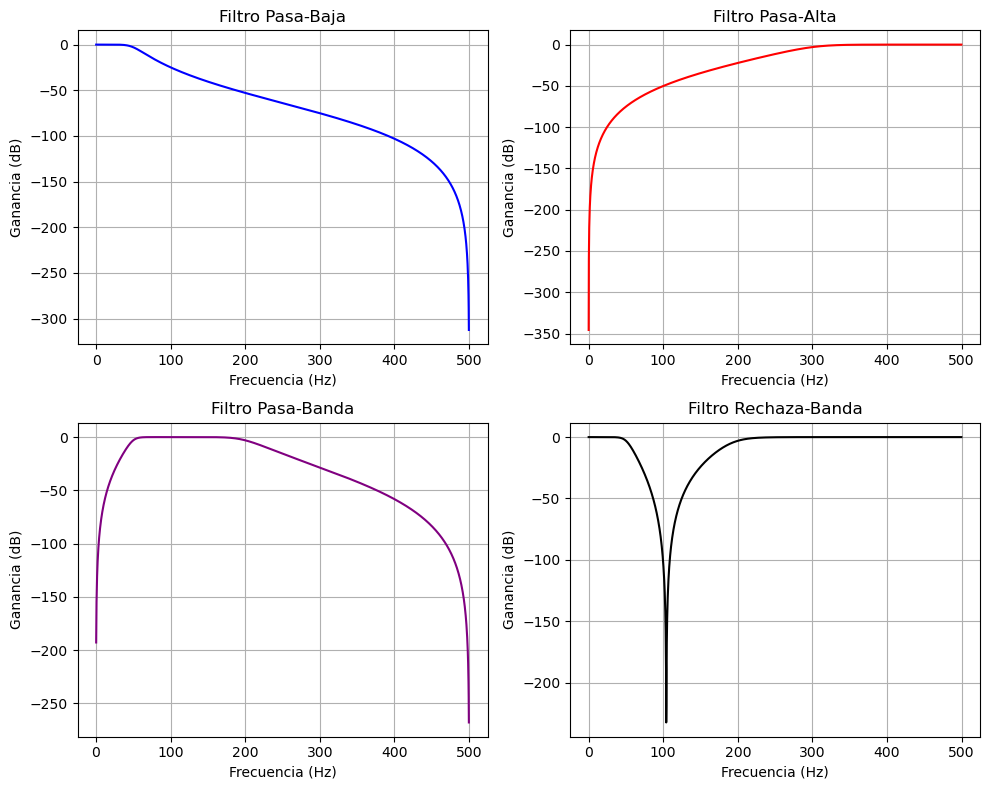

In [226]:
fs = 1000  # Frecuencia de muestreo
order = 4  # Orden del filtro
lowcut = 50  # Frecuencia de corte baja
highcut = 200  # Frecuencia de corte alta
nyq = 0.5 * fs  # Frecuencia de Nyquist

# Filtros
# Filtro pasa-baja
b_low, a_low = butter(order, lowcut / nyq, btype='low')

# Filtro pasa-alta
b_high, a_high = butter(order, 300 / nyq, btype='high')

# Filtro pasa-banda
b_band, a_band = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Filtro rechaza-banda
b_stop, a_stop = butter(order, [lowcut / nyq, highcut / nyq], btype='bandstop')

# Calcular las respuestas en frecuencia
w_low, h_low = freqz(b_low, a_low, worN=2000)
w_high, h_high = freqz(b_high, a_high, worN=2000)
w_band, h_band = freqz(b_band, a_band, worN=2000)
w_stop, h_stop = freqz(b_stop, a_stop, worN=2000)

# Crear la figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Pasa-baja
axs[0, 0].plot((fs * 0.5 / np.pi) * w_low, 20 * np.log10(abs(h_low)),"b")
axs[0, 0].set_title('Filtro Pasa-Baja')
axs[0, 0].set_xlabel('Frecuencia (Hz)')
axs[0, 0].set_ylabel('Ganancia (dB)')
axs[0, 0].grid()

# Pasa-alta
axs[0, 1].plot((fs * 0.5 / np.pi) * w_high, 20 * np.log10(abs(h_high)),"r")
axs[0, 1].set_title('Filtro Pasa-Alta')
axs[0, 1].set_xlabel('Frecuencia (Hz)')
axs[0, 1].set_ylabel('Ganancia (dB)')
axs[0, 1].grid()

# Pasa-banda
axs[1, 0].plot((fs * 0.5 / np.pi) * w_band, 20 * np.log10(abs(h_band)),"purple")
axs[1, 0].set_title('Filtro Pasa-Banda')
axs[1, 0].set_xlabel('Frecuencia (Hz)')
axs[1, 0].set_ylabel('Ganancia (dB)')
axs[1, 0].grid()

# Rechaza-banda
axs[1, 1].plot((fs * 0.5 / np.pi) * w_stop, 20 * np.log10(abs(h_stop)),"black")
axs[1, 1].set_title('Filtro Rechaza-Banda')
axs[1, 1].set_xlabel('Frecuencia (Hz)')
axs[1, 1].set_ylabel('Ganancia (dB)')
axs[1, 1].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

## Aproximaciones en Filtros

### Aproximación Butterworth
Tiene una respuesta en frecuencia **máximamente plana** en la banda de paso, ideal para aplicaciones con **buena fidelidad** en esa banda [2].

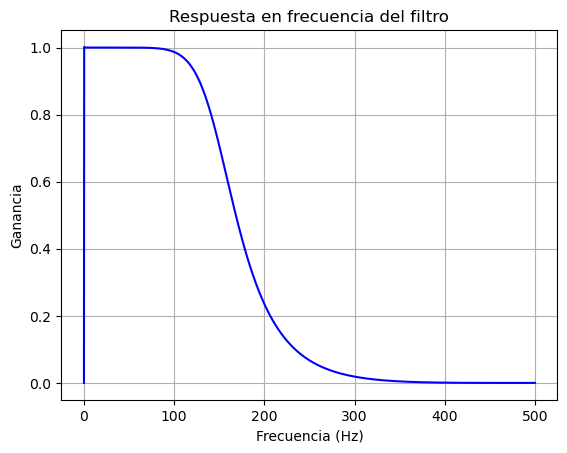

In [195]:
from scipy.signal import freqz, butter
fs=1000
bb,aa=filtro2(0.05,150,fs,4)
w, h = freqz(bb, aa, worN=2000)

# Graficar la respuesta en frecuencia
plt.plot((fs * 0.5 / np.pi) * w, abs(h), 'b')
plt.title("Respuesta en frecuencia del filtro")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()
plt.show()

### Aproximación Chebyshev
Permite una **ondulación controlada en la banda de paso**, ofreciendo mayor atenuación en la banda de rechazo [2].

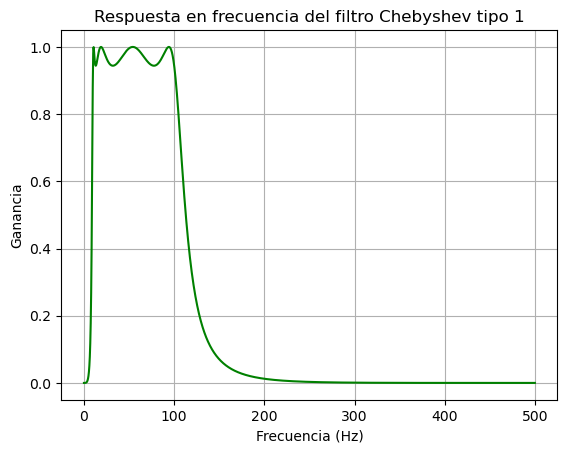

In [199]:
from scipy.signal import cheby1
fs = 1000          # Frecuencia de muestreo
lowcut = 10      # Frecuencia de corte baja
highcut = 100      # Frecuencia de corte alta
order = 4          # Orden del filtro
rp = 0.5           # Rizado máximo permitido en la banda de paso en dB

# Frecuencia de Nyquist
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

# Diseñar el filtro Chebyshev tipo 1
b_cheby, a_cheby = cheby1(order, rp, [low, high], btype='band')

# Calcular la respuesta en frecuencia
w, h = freqz(b_cheby, a_cheby, worN=2000)

# Graficar la respuesta en frecuencia
plt.plot((fs * 0.5 / np.pi) * w, abs(h), 'g')
plt.title("Respuesta en frecuencia del filtro Chebyshev tipo 1")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()
plt.show()

### Aproximación Chebyshev Inversa
Mantiene una banda de paso **monotónica**, pero ondula la banda de rechazo, útil para una **banda de paso más suave** [2].

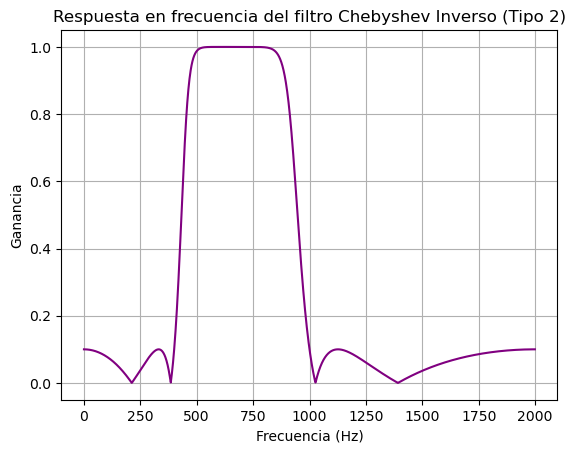

In [211]:
from scipy.signal import cheby2
fs = 4000          # Frecuencia de muestreo
lowcut = 400      # Frecuencia de corte baja
highcut = 1000      # Frecuencia de corte alta
order = 4          # Orden del filtro
rs = 20            # Atenuación mínima en la banda de rechazo en dB

# Frecuencia de Nyquist
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

# Diseñar el filtro Chebyshev Inverso tipo 2
b_cheby_inv, a_cheby_inv = cheby2(order, rs, [low, high], btype='band')

# Calcular la respuesta en frecuencia
w, h = freqz(b_cheby_inv, a_cheby_inv, worN=2000)

# Graficar la respuesta en frecuencia
plt.plot((fs * 0.5 / np.pi) * w, abs(h), 'purple')
plt.title("Respuesta en frecuencia del filtro Chebyshev Inverso (Tipo 2)")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()
plt.show()

### Aproximación Elíptica
Es la más eficiente en términos de **atenuación** y **pendiente**, aunque más compleja de diseñar. Ofrece transiciones rápidas entre bandas [2].

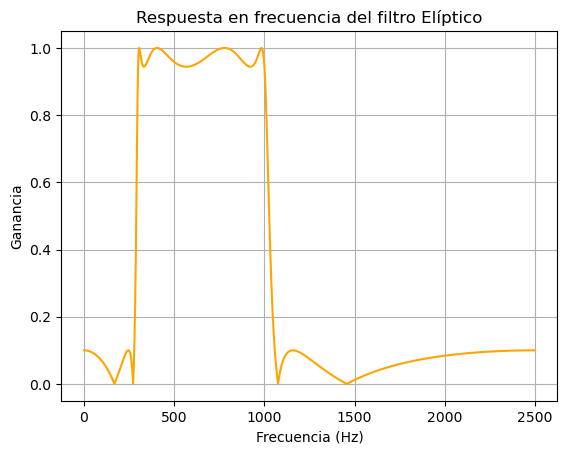

In [210]:
from scipy.signal import ellip
fs = 5000          # Frecuencia de muestreo
lowcut = 300      # Frecuencia de corte baja
highcut = 1000      # Frecuencia de corte alta
order = 4          # Orden del filtro
rp = 0.5           # Rizado máximo en la banda de paso (en dB)
rs = 20            # Atenuación mínima en la banda de rechazo (en dB)

# Frecuencia de Nyquist
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

# Diseñar el filtro Elíptico
b_ellip, a_ellip = ellip(order, rp, rs, [low, high], btype='band')

# Calcular la respuesta en frecuencia
w, h = freqz(b_ellip, a_ellip, worN=2000)

# Graficar la respuesta en frecuencia
plt.plot((fs * 0.5 / np.pi) * w, abs(h), 'orange')
plt.title("Respuesta en frecuencia del filtro Elíptico")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()
plt.show()

## Filtros FIR e IIR 
### Filtros FIR (Finite Impulse Response) [3]
- Tienen una **respuesta finita al impulso** y son **estables**.
- Se utilizan cuando se necesita una **fase lineal**.
- Su salida se calcula como la convolución de la entrada con los coeficientes del filtro:


  $$ y[n] = \sum_{k=0}^{N} h[k] \cdot x[n-k] $$
  

  Donde \( h[k] \) son los coeficientes del filtro y \( N \) es el orden del filtro.



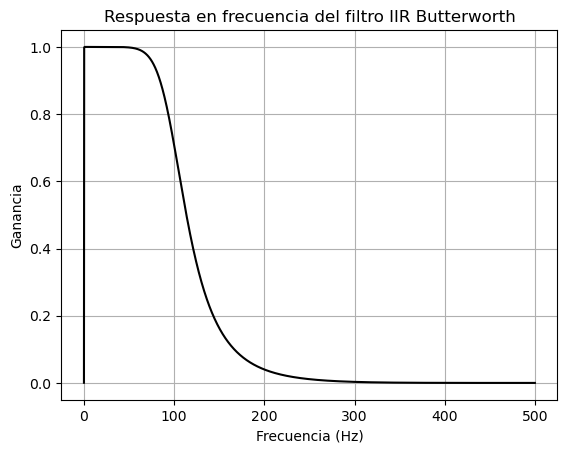

In [212]:
fs = 1000          # Frecuencia de muestreo
lowcut = 0.05      # Frecuencia de corte baja
highcut = 100      # Frecuencia de corte alta
order = 4          # Orden del filtro

# Frecuencia de Nyquist
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

# Diseñar el filtro IIR Butterworth (pasa-banda)
b_iir, a_iir = butter(order, [low, high], btype='band')

# Calcular la respuesta en frecuencia
w, h = freqz(b_iir, a_iir, worN=2000)

# Graficar la respuesta en frecuencia
plt.plot((fs * 0.5 / np.pi) * w, abs(h), 'black')
plt.title("Respuesta en frecuencia del filtro IIR Butterworth")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()
plt.show()

### Filtros IIR (Infinite Impulse Response) [3]
- Tienen una **respuesta infinita al impulso** y son más eficientes, aunque pueden ser **inestables** si no se diseñan adecuadamente.
- Su salida se calcula mediante la siguiente relación:

 $$ y[n] = \sum_{k=0}^{N} b_k \cdot x[n-k] - \sum_{m=1}^{M} a_m \cdot y[n-m] $$

  Donde los coeficientes \( b_k \) y \( a_m \) definen el comportamiento del filtro.


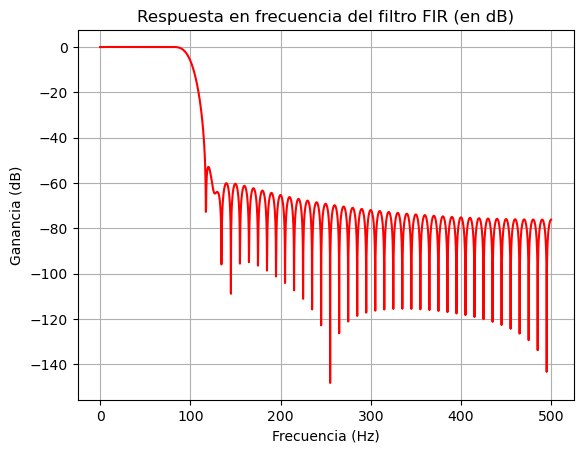

In [218]:
from scipy.signal import firwin
fs = 1000          # Frecuencia de muestreo
lowcut = 0.05      # Frecuencia de corte baja
highcut = 100      # Frecuencia de corte alta
order = 101        # Orden del filtro (número de coeficientes del FIR)

# Frecuencia de Nyquist
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

# Diseñar el filtro FIR utilizando la ventana de Hamming
b_fir = firwin(order, [low, high], pass_zero=False, window='hamming')

# Calcular la respuesta en frecuencia
w, h = freqz(b_fir, worN=2000)

# Convertir la respuesta en frecuencia a decibelios (dB)
h_dB = 20 * np.log10(abs(h))

# Graficar la respuesta en frecuencia en dB
plt.plot((fs * 0.5 / np.pi) * w, h_dB, 'red')
plt.title("Respuesta en frecuencia del filtro FIR (en dB)")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.grid()
plt.show()

## Análisis de Señales de ECG y EMG

Se analizarán 3 señales de **ECG** y 3 señales de **EMG**. Estas bioseñales, que provienen del cuerpo humano, tienen rangos específicos de frecuencia. Para poder estudiarlas adecuadamente, es crucial conocer estos rangos y aplicar filtros que eliminen el ruido y las frecuencias no deseadas.

### Rango de Frecuencias para las Bioseñales [4]

- **ECG**: Su rango de frecuencias está comprendido entre **0.05 Hz y 100 Hz**.
- **EMG de superficie**: Tiene un rango de frecuencias de **2 Hz a 500 Hz**.

Debido a la naturaleza de estas señales y la necesidad de obtener datos precisos, es importante aplicar **filtros de frecuencia** que eliminen las señales no deseadas, las cuales contaminan las bioseñales. Así, el uso de filtros se vuelve indispensable para lograr una correcta adquisición y análisis de las señales.

### Frecuencia de Muestreo

Para la obtención de las señales, se utilizó el dispositivo **Bitalino**, que cuenta con una **frecuencia de muestreo (fs) de 1000 Hz**. Esto permite captar las señales con suficiente resolución temporal para su posterior análisis.



---- 

### Señal ECG

Para el análisis de las señales de ECG, se seleccionaron aquellas que presentaban mayor cantidad de ruido. Este análisis fue realizado en el **LAB5 ECG**, donde se observó que la mayoría del ruido provenía de la derivada 3, especialmente en las siguientes condiciones:

- Estado basal
- Mantener la respiración
- Después de realizar ejercicio

#### Señales


c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


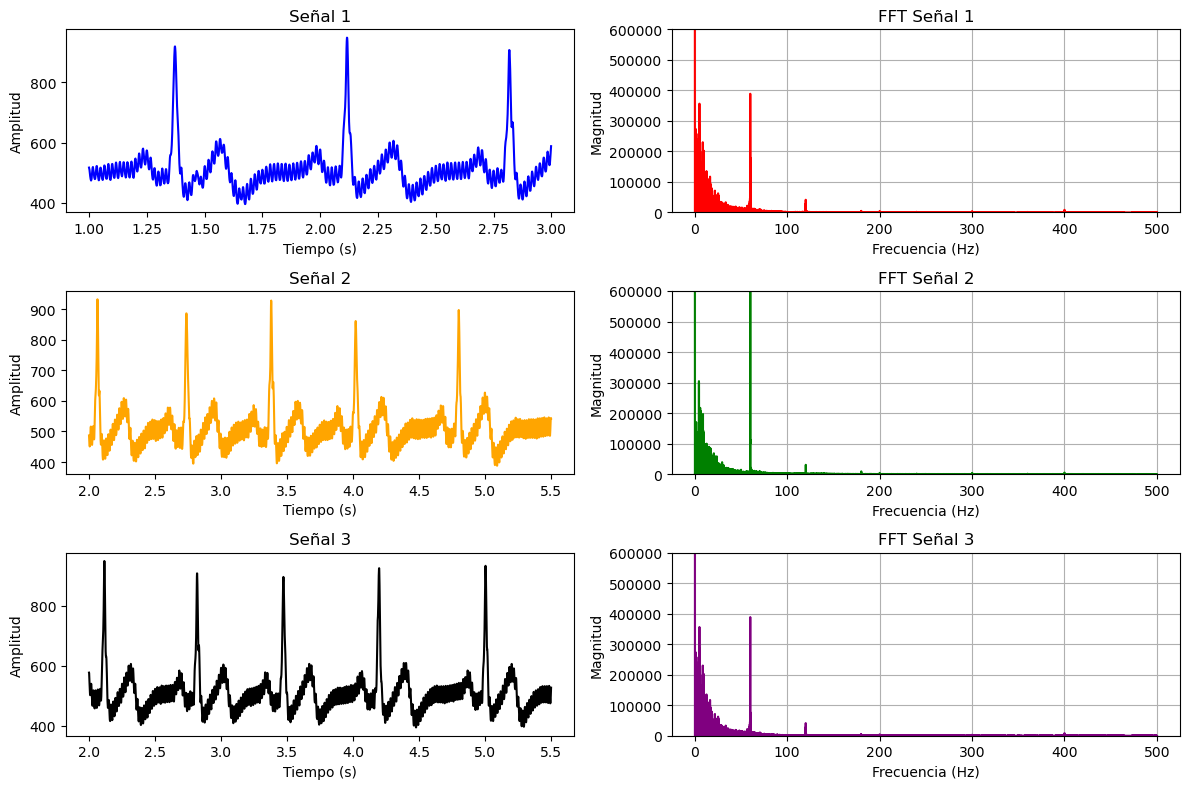

In [191]:
# Cargar las señales
señal1 = funcion_leer("señal1.txt")
señal2 = funcion_leer("señal2.txt")
señal3 = funcion_leer("señal3.txt")

# Definir el tiempo para las tres señales
t1 = np.arange(len(señal1)) / 1000
t2 = np.arange(len(señal2)) / 1000
t3 = np.arange(len(señal3)) / 1000

# Crear las subplots: 3 filas y 2 columnas
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

# Señal 1
axs[0, 0].plot(t1[1000:3000], señal1[1000:3000], color="blue")
axs[0, 0].set_title("Señal 1")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Amplitud")

f1, h1 = calcular_fft(señal1, 1000)
axs[0, 1].plot(f1[:len(f1)//2], h1[:len(h1)//2], "red")
axs[0, 1].set_title("FFT Señal 1")
axs[0, 1].set_xlabel("Frecuencia (Hz)")
axs[0, 1].set_ylabel("Magnitud")
axs[0, 1].set_ylim([0, 0.6*10**6])
axs[0, 1].grid(True)

# Señal 2
axs[1, 0].plot(t2[2000:5500], señal2[2000:5500], color="orange")
axs[1, 0].set_title("Señal 2")
axs[1, 0].set_xlabel("Tiempo (s)")
axs[1, 0].set_ylabel("Amplitud")

f2, h2 = calcular_fft(señal2, 1000)
axs[1, 1].plot(f2[:len(f2)//2], h2[:len(h2)//2], "green")
axs[1, 1].set_title("FFT Señal 2")
axs[1, 1].set_xlabel("Frecuencia (Hz)")
axs[1, 1].set_ylabel("Magnitud")
axs[1, 1].set_ylim([0, 0.6*10**6])
axs[1, 1].grid(True)

# Señal 3
axs[2, 0].plot(t3[2000:5500], señal3[2000:5500], color="black")
axs[2, 0].set_title("Señal 3")
axs[2, 0].set_xlabel("Tiempo (s)")
axs[2, 0].set_ylabel("Amplitud")

f3, h3 = calcular_fft(señal3, 1000)
axs[2, 1].plot(f3[:len(f3)//2], h3[:len(h3)//2], "purple")
axs[2, 1].set_title("FFT Señal 3")
axs[2, 1].set_xlabel("Frecuencia (Hz)")
axs[2, 1].set_ylabel("Magnitud")
axs[2, 1].set_ylim([0, 0.6*10**6])
axs[2, 1].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()


### Análisis de las Señales ECG

Al analizar las señales de ECG, se observó la presencia de dos componentes de frecuencia importantes al realizar la **Transformada Rápida de Fourier (FFT)**:

1. Una frecuencia cercana a los **60 Hz**, con un valor elevado.
2. Otra frecuencia más pequeña, pero notable, alrededor de los **100 Hz**.

La frecuencia en **60 Hz** es probablemente causada por el ruido ambiental, ya que el sistema de energización en Perú opera a **220V@60 Hz**. En cuanto a la frecuencia alrededor de los **100 Hz**, se trata de ruido, debido a que las señales de ECG tienen un rango de frecuencias comprendido entre **0.05 Hz** y **100 Hz**, lo que significa que cualquier frecuencia por encima de este rango es ruido no deseado.

----

### Señal EMG

En el análisis de las señales de **EMG**, se seleccionaron aquellas que presentaban una mayor cantidad de actividad muscular. Este análisis fue realizado en el **LAB5 EMG**, donde se evaluaron las señales en las siguientes condiciones:

- Reposo, contracción suave y contracción intensa del brazo.
- Reposo, contracción suave y contracción intensa del gastrocnemio.
- Reposo, contracción suave y contracción intensa del tríceps.


  
#### Señales

c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


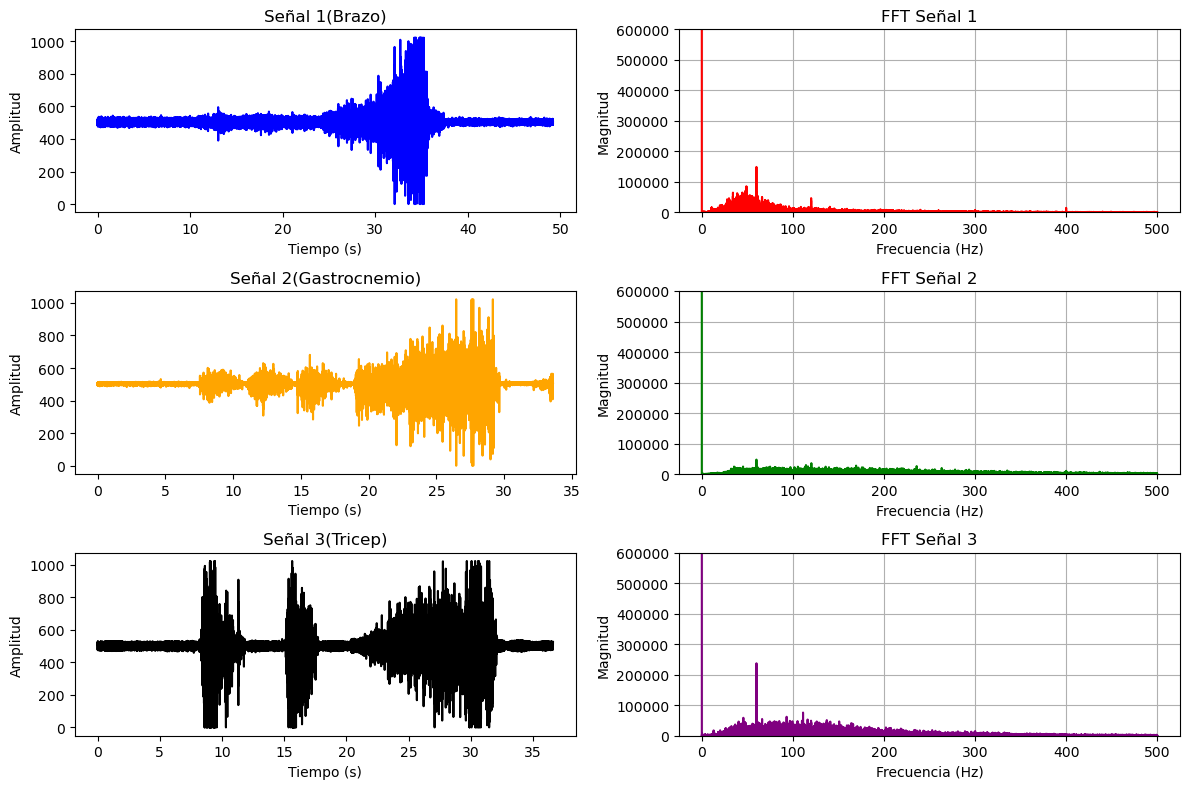

In [120]:
# Cargar las señales
señal11 = funcion_leer("emg1.txt")
señal22 = funcion_leer("emg8.txt")
señal33 = funcion_leer("emg4.txt")

# Definir el tiempo para las tres señales
t1 = np.arange(len(señal11)) / 1000
t2 = np.arange(len(señal22)) / 1000
t3 = np.arange(len(señal33)) / 1000

# Crear las subplots: 3 filas y 2 columnas
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

# Señal 1
axs[0, 0].plot(t1, señal11, color="blue")
axs[0, 0].set_title("Señal 1(Brazo)")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Amplitud")

f1, h1 = calcular_fft(señal11, 1000)
axs[0, 1].plot(f1[:len(f1)//2], h1[:len(h1)//2], "red")
axs[0, 1].set_title("FFT Señal 1")
axs[0, 1].set_xlabel("Frecuencia (Hz)")
axs[0, 1].set_ylabel("Magnitud")
axs[0, 1].set_ylim([0, 0.6*10**6])
axs[0, 1].grid(True)

# Señal 2
axs[1, 0].plot(t2, señal22, color="orange")
axs[1, 0].set_title("Señal 2(Gastrocnemio)")
axs[1, 0].set_xlabel("Tiempo (s)")
axs[1, 0].set_ylabel("Amplitud")

f2, h2 = calcular_fft(señal22, 1000)
axs[1, 1].plot(f2[:len(f2)//2], h2[:len(h2)//2], "green")
axs[1, 1].set_title("FFT Señal 2")
axs[1, 1].set_xlabel("Frecuencia (Hz)")
axs[1, 1].set_ylabel("Magnitud")
axs[1, 1].set_ylim([0, 0.6*10**6])
axs[1, 1].grid(True)

# Señal 3
axs[2, 0].plot(t3, señal33, color="black")
axs[2, 0].set_title("Señal 3(Tricep)")
axs[2, 0].set_xlabel("Tiempo (s)")
axs[2, 0].set_ylabel("Amplitud")

f3, h3 = calcular_fft(señal33, 1000)
axs[2, 1].plot(f3[:len(f3)//2], h3[:len(h3)//2], "purple")
axs[2, 1].set_title("FFT Señal 3")
axs[2, 1].set_xlabel("Frecuencia (Hz)")
axs[2, 1].set_ylabel("Magnitud")
axs[2, 1].set_ylim([0, 0.6*10**6])
axs[2, 1].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Análisis de las Señales EMG

Al analizar las señales de **EMG**, se identificaron dos componentes de frecuencia importantes al realizar la **Transformada Rápida de Fourier (FFT)**:

1. Una frecuencia cercana a los **60 Hz**, con un valor elevado.

La frecuencia en **60 Hz** probablemente corresponde a ruido ambiental, ya que en Perú el sistema de energización opera a **220V@60 Hz**. 

Es importante recordar que el dispositivo **BITalino** tiene una frecuencia de muestreo (**fs**) de **1000 Hz**, lo que le permite analizar señales de hasta **500 Hz**. Dado que el rango de frecuencias de la señal EMG está entre **2 Hz** y **500 Hz**, se debe prestar especial atención al filtrado, especialmente en frecuencias cercanas a los **500 Hz**, para asegurar la correcta eliminación de ruido sin afectar la señal de interés.


----

### Selección de Filtros

Dado que las señales presentan ruido ambiental a **60 Hz**, es recomendable aplicar un **filtro rechaza banda** en esta frecuencia para eliminar el ruido no deseado.

Además, se observó que estas señales tienen un rango de frecuencias específico que debe preservarse. Por lo tanto, se aplicará un **filtro pasabanda** que permita mantener únicamente las frecuencias dentro del rango de interés, asegurando que no se eliminen componentes relevantes de la señal durante el proceso de filtrado.

Para el filtro pasabanda se evaluarán tanto filtros **FIR** como **IIR**, y se realizará un análisis comparativo para determinar cuál de ellos proporciona un mejor rendimiento para las señales estudiadas.



  <h3>Filtro cheby2(IRR) </h3>


In [121]:
def filtro1(lowcut, highcut, fs):
    order = 4  # Orden del filtro
    attenuation_stop = 60  # Atenuación en la banda de stop en dB

    # Normalización de las frecuencias de corte (dividimos por la frecuencia de Nyquist)
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    # Diseño del filtro Chebyshev tipo II pasabanda
    b, a = signal.cheby2(order, attenuation_stop, [low, high], btype='band', analog=False, output='ba')

    return b, a

### Filtro cheby2(IRR) ECG
- **Frecuencia de corte baja**: 0.05 Hz
- **Frecuencia de corte alta**: 100 Hz


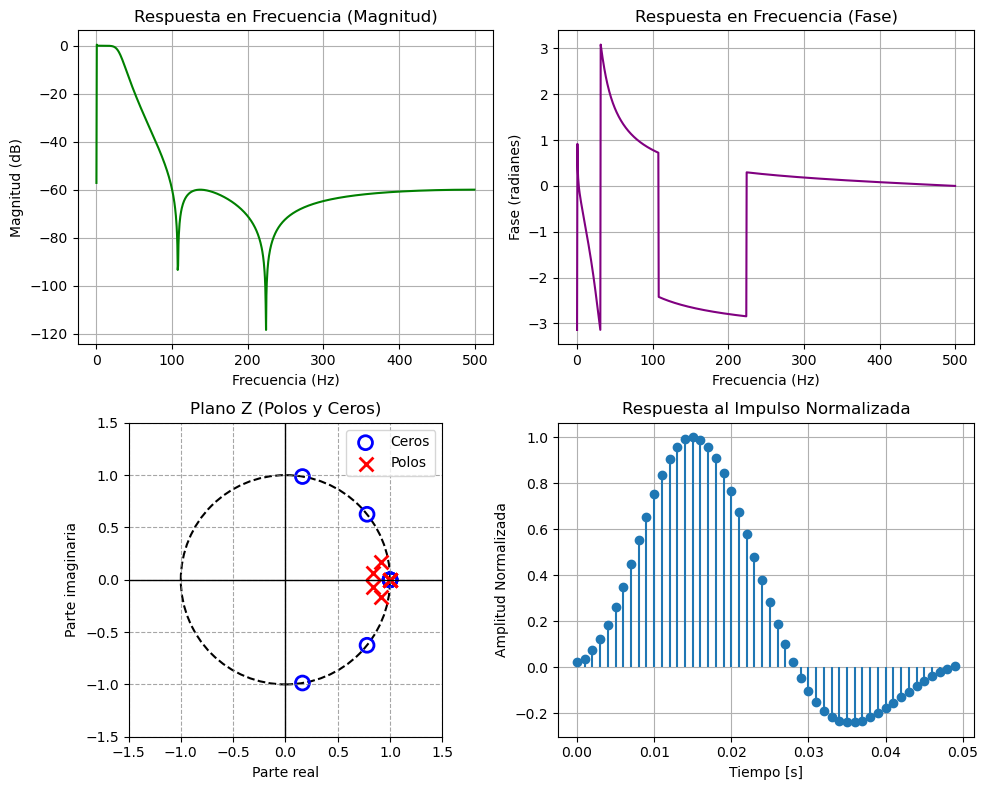

In [148]:
fs=1000
b,a=filtro1(0.05,100,fs)
b1,a1=b,a
analizar_filtro(b,a,fs)

A partir del gráfico de **magnitud en dB** y del **Plano Z (Polos y Ceros)**, se puede observar que aproximadamente en **100 Hz** hay un cero en el Plano Z. Esto explica por qué en el gráfico de magnitud se registra un valor de **-60 dB** en esa frecuencia, indicando una fuerte atenuación en ese punto.

En el **diagrama de polos y ceros**, se observa que a una frecuencia aproximada de **0 Hz** hay un cero (◯), seguido de varios polos (×). Esto se debe a que la **frecuencia de corte** está en **0.05 Hz**, lo que explica la presencia del cero en frecuencias muy bajas. Los polos cercanos tienen la función de elevar la ganancia de la señal después de pasar por un cero muy cercano a 0 Hz. Este diseño es necesario para compensar la atenuación provocada por el cero, permitiendo así que las frecuencias de interés se amplifiquen adecuadamente después del punto de corte.


En el **diagrama de fase**, se observan cambios abruptos en ciertas frecuencias, lo que puede provocar que la señal presente **retrasos** o **adelantos** dependiendo de la frecuencia. Estos cambios en la fase pueden generar **distorsiones no deseadas** en la señal, particularmente en las frecuencias donde los saltos son más pronunciados. Si la fase no sigue un comportamiento lineal o predecible, como es el caso de fases aleatorias o no uniformes, esto indica una característica indeseable que debe ser analizada con mayor cuidado para evitar deformaciones en la señal filtrada.

En cuanto a la **respuesta al impulso**, se observa un comportamiento natural que sugiere que el sistema es **estable**, lo que es un aspecto positivo. La estabilidad garantiza que el sistema no producirá una salida infinita o no controlada, asegurando que las respuestas a las entradas permanezcan acotadas, lo que es crucial en el procesamiento de señales para evitar resultados impredecibles o erróneos.


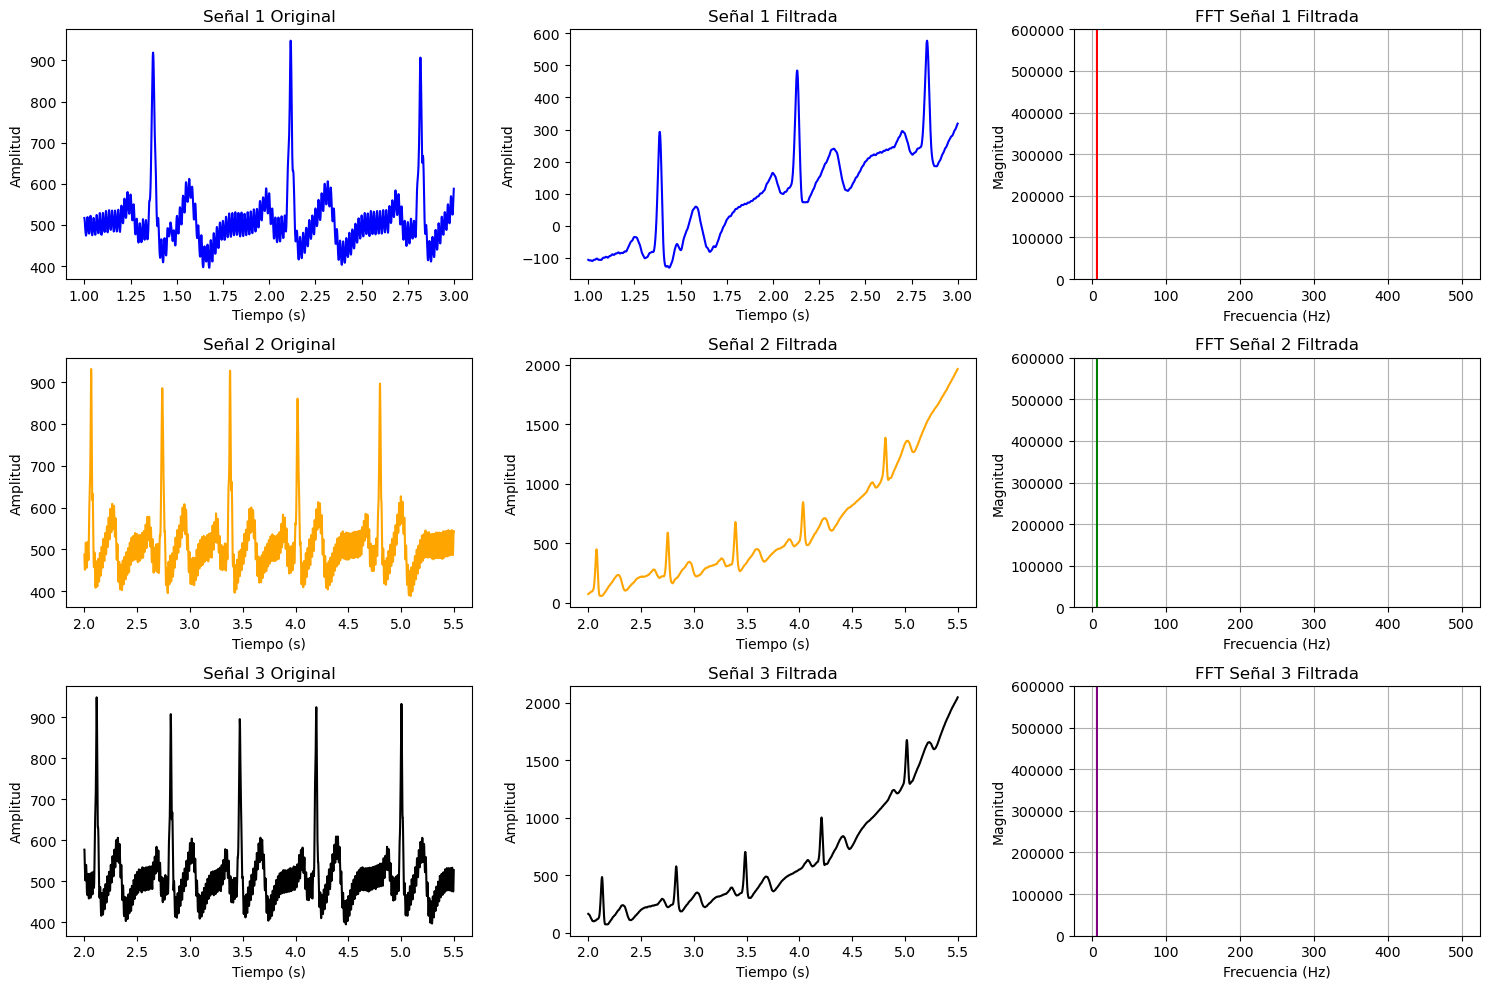

In [151]:
y1 = signal.lfilter(b, a, señal1)
y2 = signal.lfilter(b, a, señal2)
y3 = signal.lfilter(b, a, señal3)

# Crear las subplots: 3 filas y 3 columnas (Señal Original, Señal Filtrada, FFT)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Señal 1
# Columna 1: Señal Original
axs[0, 0].plot(t1[1000:3000], señal1[1000:3000], color="blue")
axs[0, 0].set_title("Señal 1 Original")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[0, 1].plot(t1[1000:3000], y1[1000:3000], color="blue")
axs[0, 1].set_title("Señal 1 Filtrada")
axs[0, 1].set_xlabel("Tiempo (s)")
axs[0, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f1, h1 = calcular_fft(y1, 1000)
axs[0, 2].plot(f1[:len(f1)//2], h1[:len(h1)//2], "red")
axs[0, 2].set_title("FFT Señal 1 Filtrada")
axs[0, 2].set_xlabel("Frecuencia (Hz)")
axs[0, 2].set_ylabel("Magnitud")
axs[0, 2].set_ylim([0, 0.6*10**6])
axs[0, 2].grid(True)

# Señal 2
# Columna 1: Señal Original
axs[1, 0].plot(t2[2000:5500], señal2[2000:5500], color="orange")
axs[1, 0].set_title("Señal 2 Original")
axs[1, 0].set_xlabel("Tiempo (s)")
axs[1, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[1, 1].plot(t2[2000:5500], y2[2000:5500], color="orange")
axs[1, 1].set_title("Señal 2 Filtrada")
axs[1, 1].set_xlabel("Tiempo (s)")
axs[1, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f2, h2 = calcular_fft(y2, 1000)
axs[1, 2].plot(f2[:len(f2)//2], h2[:len(h2)//2], "green")
axs[1, 2].set_title("FFT Señal 2 Filtrada")
axs[1, 2].set_xlabel("Frecuencia (Hz)")
axs[1, 2].set_ylabel("Magnitud")
axs[1, 2].set_ylim([0, 0.6*10**6])
axs[1, 2].grid(True)

# Señal 3
# Columna 1: Señal Original
axs[2, 0].plot(t3[2000:5500], señal3[2000:5500], color="black")
axs[2, 0].set_title("Señal 3 Original")
axs[2, 0].set_xlabel("Tiempo (s)")
axs[2, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[2, 1].plot(t3[2000:5500], y3[2000:5500], color="black")
axs[2, 1].set_title("Señal 3 Filtrada")
axs[2, 1].set_xlabel("Tiempo (s)")
axs[2, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f3, h3 = calcular_fft(y3, 1000)
axs[2, 2].plot(f3[:len(f3)//2], h3[:len(h3)//2], "purple")
axs[2, 2].set_title("FFT Señal 3 Filtrada")
axs[2, 2].set_xlabel("Frecuencia (Hz)")
axs[2, 2].set_ylabel("Magnitud")
axs[2, 2].set_ylim([0, 0.6*10**6])
axs[2, 2].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

A partir del filtro **Chebyshev tipo II** aplicado a la señal de **ECG**, se observa que la señal ha sido filtrada en la mayoría de las frecuencias, lo cual no es lo deseado, ya que se esperaba mantener el rango entre **0.05 Hz** y **100 Hz**.

En la señal filtrada se nota que la amplitud aumenta progresivamente, lo que indica que el filtrado no ha sido completamente adecuado. Este comportamiento ascendente en la señal filtrada sugiere que puede haber pasado ruido o que el filtro no ha sido sintonizado correctamente.

El gráfico de la **FFT** de la señal filtrada confirma que las frecuencias cercanas a **0 Hz** han sido afectadas, lo que podría explicar el comportamiento no deseado en la señal temporal.


### Filtro cheby2(IRR) EMG
- **Frecuencia de corte baja**: 2 Hz
- **Frecuencia de corte alta**: 499.9 Hz

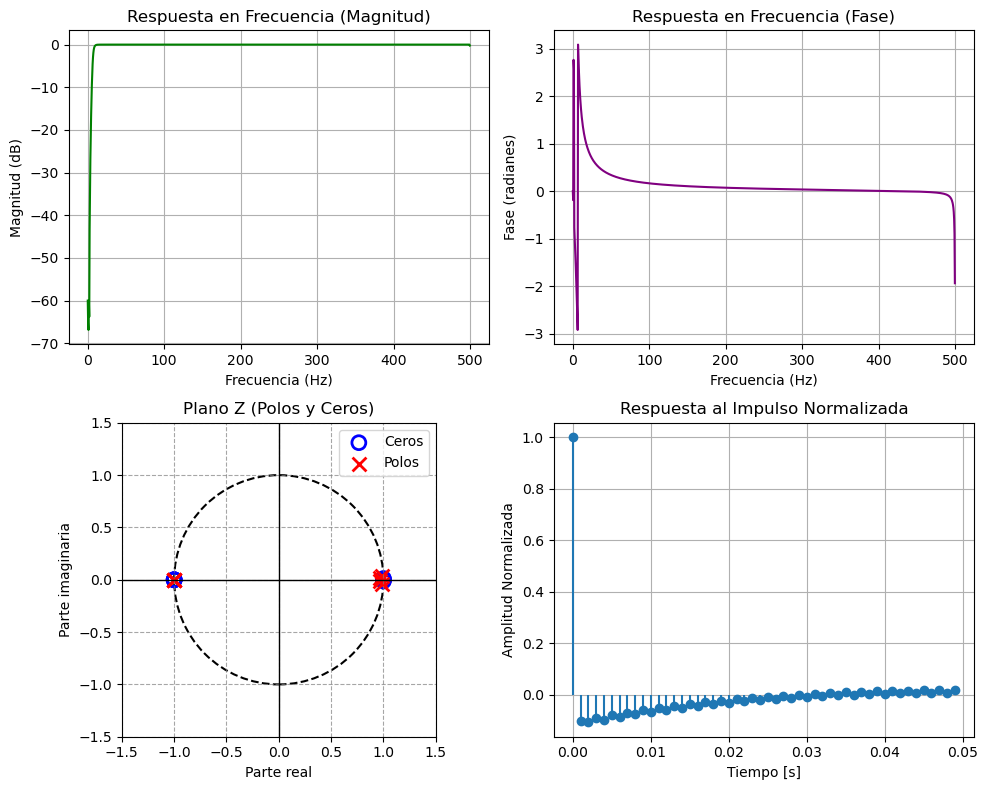

In [161]:
fs=1000
b11,a11=filtro1(2,499.9,fs)
analizar_filtro(b11,a11,fs)

En el **diagrama de polos y ceros**, se observa que alrededor de **2 Hz** hay un cero (◯), lo cual corresponde a la frecuencia de corte baja del filtro. A partir de esta frecuencia, los polos (×) comienzan a aparecer, lo que permite aumentar la ganancia y estabilizar la señal después de pasar por el cero. Este diseño asegura que las frecuencias por debajo de **2 Hz** se atenúan, mientras que las frecuencias dentro del rango de interés (de **2 Hz a 500 Hz**) se amplifican correctamente, lo analogo sucede cercano a 500 hz.

En el gráfico de **magnitud en dB**, se puede observar que la señal tiene una atenuación significativa por debajo de **2 Hz**, lo cual confirma la efectividad del filtro en bloquear las frecuencias indeseadas en ese rango. Después de los **2 Hz**, la magnitud se mantiene constante cerca de **0 dB**, indicando que el filtro permite el paso de las frecuencias en el rango deseado sin atenuarlas.

En el **diagrama de fase**, se observan cambios rápidos alrededor de los **2 Hz**, lo que corresponde al comportamiento típico en la transición entre el bloqueo y el paso de frecuencias. El comportamiento de la fase es relativamente estable en las frecuencias más altas(se asemeja a una funcion constante), lo que indica que no hay distorsiones significativas en esas áreas, practicamente el retraso o adelanto es poco.

En la **respuesta al impulso**, se confirma la estabilidad del sistema, ya que el comportamiento de la respuesta se mantiene acotado, sin tendencias inestables o indeseadas. Este comportamiento garantiza que el filtro está bien diseñado para su propósito y que procesará las señales de manera adecuada.


c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


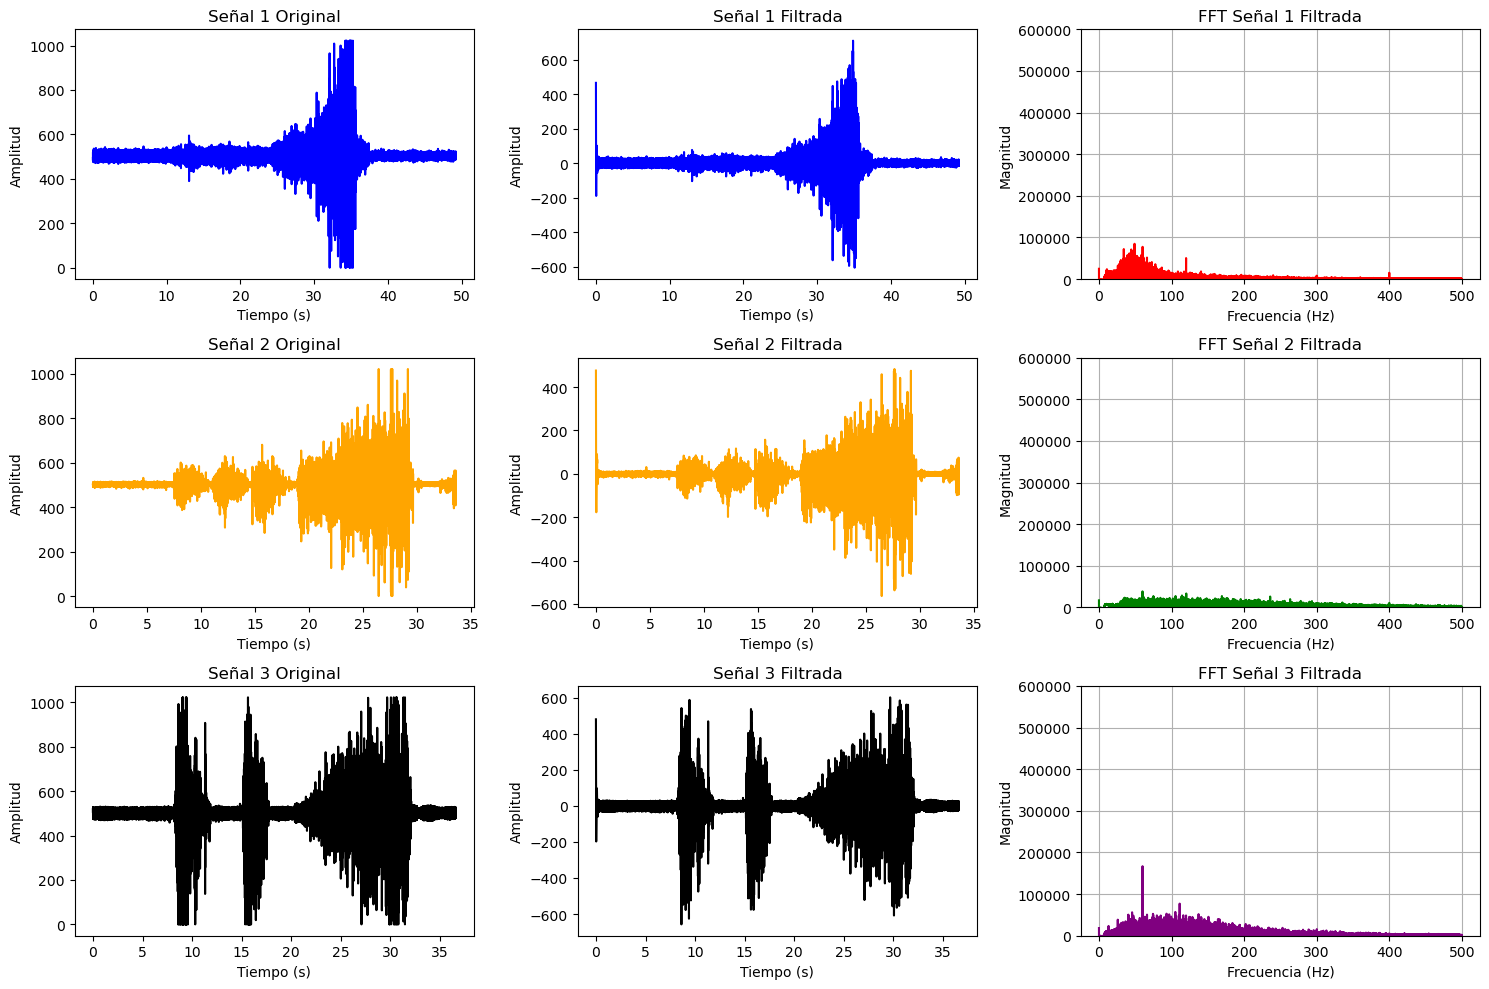

In [163]:
y11 = signal.lfilter(b11, a11, señal11)
y22 = signal.lfilter(b11, a11, señal22)
y33 = signal.lfilter(b11, a11, señal33)
t1 = np.arange(len(y11)) / 1000
t2 = np.arange(len(y22)) / 1000
t3 = np.arange(len(y33)) / 1000

# Crear las subplots: 3 filas y 3 columnas (Señal Original, Señal Filtrada, FFT)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Señal 1
# Columna 1: Señal Original
axs[0, 0].plot(t1, señal11, color="blue")
axs[0, 0].set_title("Señal 1 Original")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[0, 1].plot(t1, y11, color="blue")
axs[0, 1].set_title("Señal 1 Filtrada")
axs[0, 1].set_xlabel("Tiempo (s)")
axs[0, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f1, h1 = calcular_fft(y11, 1000)
axs[0, 2].plot(f1[:len(f1)//2], h1[:len(h1)//2], "red")
axs[0, 2].set_title("FFT Señal 1 Filtrada")
axs[0, 2].set_xlabel("Frecuencia (Hz)")
axs[0, 2].set_ylabel("Magnitud")
axs[0, 2].set_ylim([0, 0.6*10**6])
axs[0, 2].grid(True)

# Señal 2
# Columna 1: Señal Original
axs[1, 0].plot(t2, señal22, color="orange")
axs[1, 0].set_title("Señal 2 Original")
axs[1, 0].set_xlabel("Tiempo (s)")
axs[1, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[1, 1].plot(t2, y22, color="orange")
axs[1, 1].set_title("Señal 2 Filtrada")
axs[1, 1].set_xlabel("Tiempo (s)")
axs[1, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f2, h2 = calcular_fft(y22, 1000)
axs[1, 2].plot(f2[:len(f2)//2], h2[:len(h2)//2], "green")
axs[1, 2].set_title("FFT Señal 2 Filtrada")
axs[1, 2].set_xlabel("Frecuencia (Hz)")
axs[1, 2].set_ylabel("Magnitud")
axs[1, 2].set_ylim([0, 0.6*10**6])
axs[1, 2].grid(True)

# Señal 3
# Columna 1: Señal Original
axs[2, 0].plot(t3, señal33, color="black")
axs[2, 0].set_title("Señal 3 Original")
axs[2, 0].set_xlabel("Tiempo (s)")
axs[2, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[2, 1].plot(t3, y33, color="black")
axs[2, 1].set_title("Señal 3 Filtrada")
axs[2, 1].set_xlabel("Tiempo (s)")
axs[2, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f3, h3 = calcular_fft(y33, 1000)
axs[2, 2].plot(f3[:len(f3)//2], h3[:len(h3)//2], "purple")
axs[2, 2].set_title("FFT Señal 3 Filtrada")
axs[2, 2].set_xlabel("Frecuencia (Hz)")
axs[2, 2].set_ylabel("Magnitud")
axs[2, 2].set_ylim([0, 0.6*10**6])
axs[2, 2].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Análisis de la Señal Filtrada

En los gráficos se puede observar el comportamiento de la señal antes y después de aplicar un filtro diseñado para el rango de **2 Hz a 500 Hz**.

Tras aplicar el filtro, se observa una reducción en la amplitud de la señal, lo que indica que las componentes de frecuencia fuera del rango de interés han sido eliminadas. La señal se ve más suavizada, lo que sugiere que el filtro ha sido efectivo en remover las frecuencias por debajo de **2 Hz** y las altas frecuencias no deseadas.

En el espectro de frecuencias de la señal filtrada, se nota una fuerte atenuación en las frecuencias bajas, especialmente cerca de **0 Hz**, lo que refleja la eliminación de componentes de ruido de muy baja frecuencia. Sin embargo, se mantiene la componente en torno a los **60 Hz**, que proviene del ruido ambiental debido a la red eléctrica.

Para mejorar aún más la calidad de la señal, sería recomendable aplicar un **filtro rechaza banda** en los **60 Hz**. Esto permitiría eliminar por completo el ruido de esa frecuencia y, con ello, la señal estaría mucho mejor filtrada y lista para un análisis más preciso.

----


  <h4>Filtro FIR Hamming</h4>

In [83]:
def diseño_filtro_fir(lowcut, highcut, fs, order, window_type='hamming'):

    # Normalización de las frecuencias de corte
    nyq = 0.5 * fs  # Frecuencia de Nyquist
    low = lowcut / nyq
    high = highcut / nyq

    # Diseño del filtro FIR pasabanda con la ventana especificada
    b = signal.firwin(order, [low, high], pass_zero=False, window=window_type)
    return b




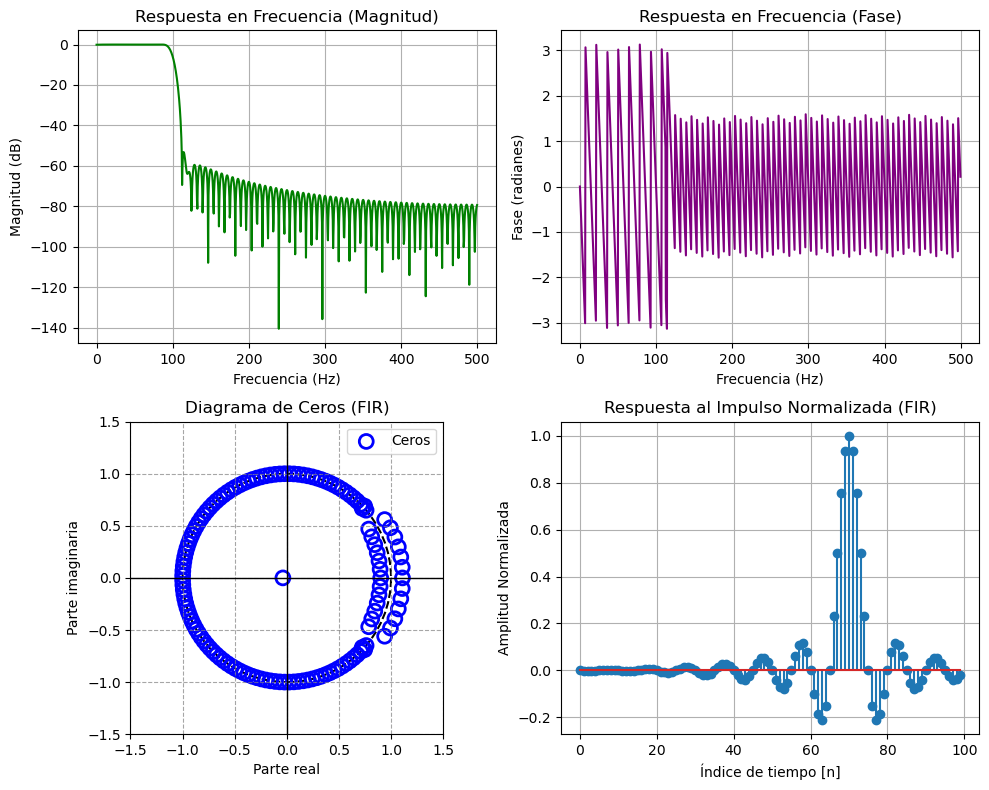

In [170]:
fs=1000
b2=diseño_filtro_fir(0.05, 100, fs, 141, window_type='hamming')
analizar_filtro_fir(b2,fs)

### Análisis

En el gráfico de magnitud se puede observar que el filtro FIR tiene una atenuación significativa fuera del rango de **0.05 Hz a 100 Hz**. Dentro de este rango, el filtro permite el paso de las frecuencias sin prácticamente ninguna atenuación (cerca de **0 dB**). Fuera de los **100 Hz**, el filtro atenúa considerablemente la magnitud que alcanza hasta por debajo de los **-100 dB**.

El gráfico de fase muestra una respuesta que varía considerablemente a lo largo del rango de frecuencias. Esta característica es común en los filtros FIR, donde la fase no necesariamente es lineal. Sin embargo, los cambios abruptos en la fase podrían generar pequeñas distorsiones en la señal.

En el diagrama de ceros (FIR) no se observan polos, ya que los filtros FIR solo poseen ceros (son sistemas que no presentan retroalimetancion o recursividad ). Los ceros están distribuidos en la circunferencia unitaria del plano Z.


 ----

### Filtro FIR Hamming ECG
- **Frecuencia de corte baja**: 0.05 Hz
- **Frecuencia de corte alta**: 100 Hz


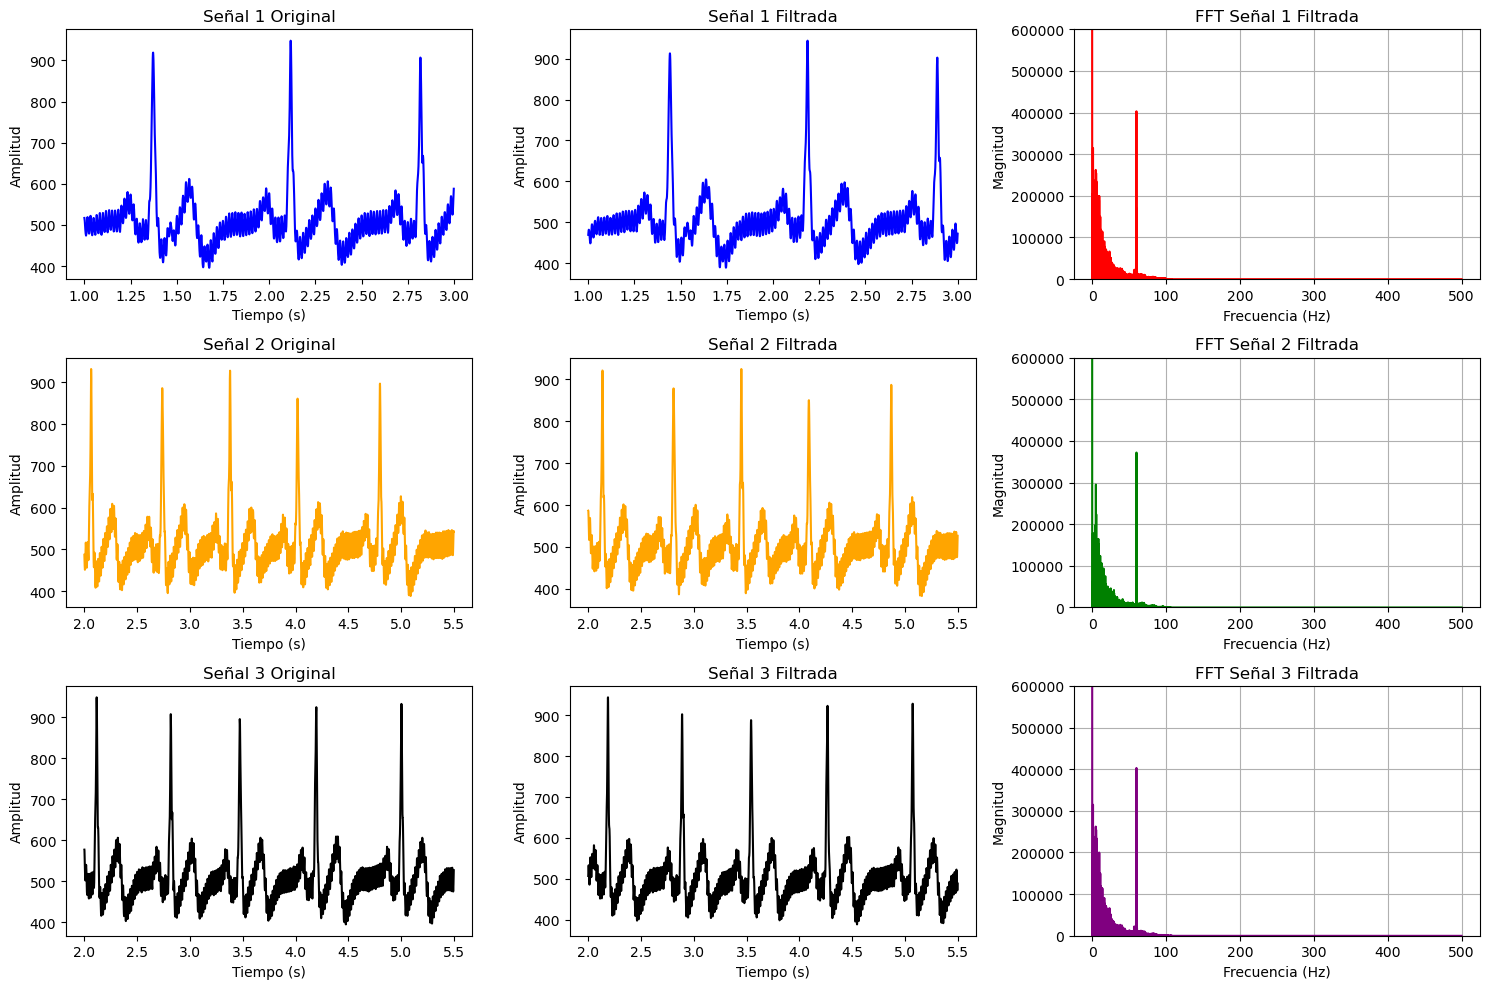

In [192]:
a2=[1]
y1 = signal.lfilter(b2, a2, señal1)
y2 = signal.lfilter(b2, a2, señal2)
y3 = signal.lfilter(b2, a2, señal3)

# Crear las subplots: 3 filas y 3 columnas (Señal Original, Señal Filtrada, FFT)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Señal 1
# Columna 1: Señal Original
axs[0, 0].plot(t1[1000:3000], señal1[1000:3000], color="blue")
axs[0, 0].set_title("Señal 1 Original")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[0, 1].plot(t1[1000:3000], y1[1000:3000], color="blue")
axs[0, 1].set_title("Señal 1 Filtrada")
axs[0, 1].set_xlabel("Tiempo (s)")
axs[0, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f1, h1 = calcular_fft(y1, 1000)
axs[0, 2].plot(f1[:len(f1)//2], h1[:len(h1)//2], "red")
axs[0, 2].set_title("FFT Señal 1 Filtrada")
axs[0, 2].set_xlabel("Frecuencia (Hz)")
axs[0, 2].set_ylabel("Magnitud")
axs[0, 2].set_ylim([0, 0.6*10**6])
axs[0, 2].grid(True)

# Señal 2
# Columna 1: Señal Original
axs[1, 0].plot(t2[2000:5500], señal2[2000:5500], color="orange")
axs[1, 0].set_title("Señal 2 Original")
axs[1, 0].set_xlabel("Tiempo (s)")
axs[1, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[1, 1].plot(t2[2000:5500], y2[2000:5500], color="orange")
axs[1, 1].set_title("Señal 2 Filtrada")
axs[1, 1].set_xlabel("Tiempo (s)")
axs[1, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f2, h2 = calcular_fft(y2, 1000)
axs[1, 2].plot(f2[:len(f2)//2], h2[:len(h2)//2], "green")
axs[1, 2].set_title("FFT Señal 2 Filtrada")
axs[1, 2].set_xlabel("Frecuencia (Hz)")
axs[1, 2].set_ylabel("Magnitud")
axs[1, 2].set_ylim([0, 0.6*10**6])
axs[1, 2].grid(True)

# Señal 3
# Columna 1: Señal Original
axs[2, 0].plot(t3[2000:5500], señal3[2000:5500], color="black")
axs[2, 0].set_title("Señal 3 Original")
axs[2, 0].set_xlabel("Tiempo (s)")
axs[2, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[2, 1].plot(t3[2000:5500], y3[2000:5500], color="black")
axs[2, 1].set_title("Señal 3 Filtrada")
axs[2, 1].set_xlabel("Tiempo (s)")
axs[2, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f3, h3 = calcular_fft(y3, 1000)
axs[2, 2].plot(f3[:len(f3)//2], h3[:len(h3)//2], "purple")
axs[2, 2].set_title("FFT Señal 3 Filtrada")
axs[2, 2].set_xlabel("Frecuencia (Hz)")
axs[2, 2].set_ylabel("Magnitud")
axs[2, 2].set_ylim([0, 0.6*10**6])
axs[2, 2].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Los espectros de frecuencia (FFT) muestran cómo, después del filtrado, se ha eliminado la mayor parte de las frecuencias fuera del rango deseado, especialmente las de baja frecuencia y las que están por encima de **100 Hz**. Sin embargo, aún se observa la presencia de ruido en torno a **60 Hz**, que corresponde al ruido electrónico proveniente de la red eléctrica.

A pesar de los posibles cambios en la fase, no se observa un retardo o adelanto significativo en las señales filtradas. 

Para mejorar aún más la calidad de las señales, sería necesario aplicar un **filtro rechaza banda** en **60 Hz** para eliminar el ruido restante proveniente de la red eléctrica. Con este ajuste, las señales estarían completamente filtradas y listas para un análisis más preciso, debido a que a simple vista la señal filtra y la original aun tiene un gran parecido. 


### Filtro FIR Hamming EMG
- **Frecuencia de corte baja**: 2 Hz
- **Frecuencia de corte alta**: 499 Hz

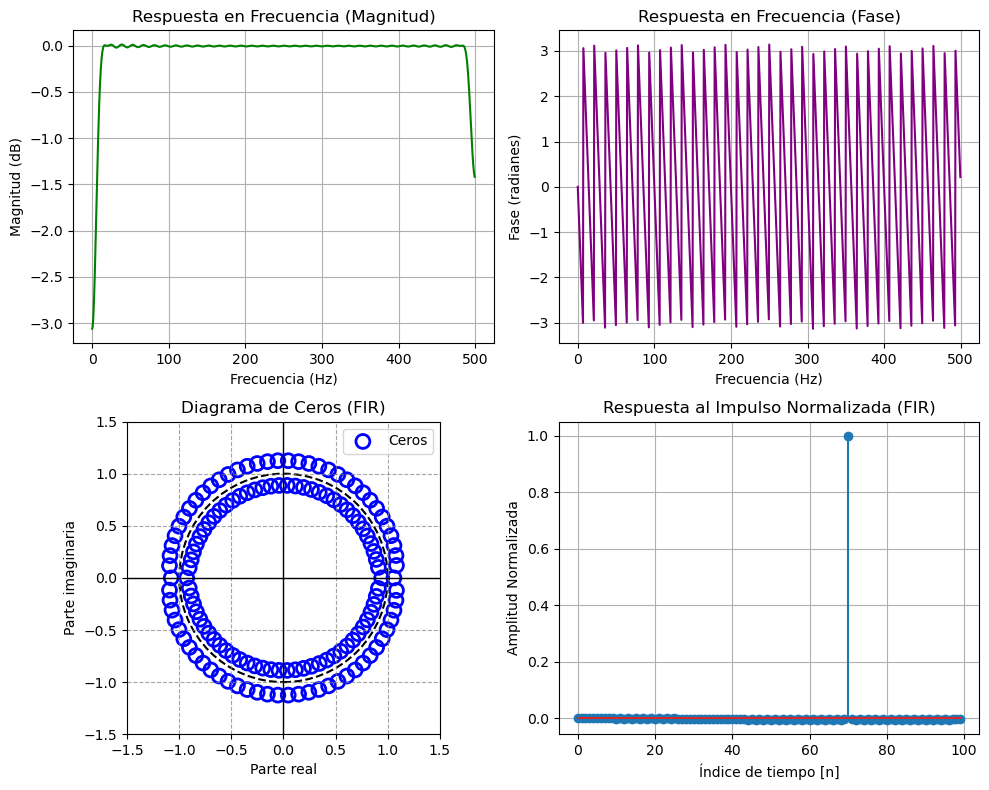

In [184]:
fs=1000
b2h=diseño_filtro_fir(2, 499, fs, 141, window_type='hamming')
analizar_filtro_fir(b2h,fs)



El gráfico de magnitud muestra que el filtro FIR tiene una respuesta plana y consistente en el rango de **2 Hz a 499 Hz**, lo que indica que no atenúa las frecuencias dentro de este rango (cerca de **0 dB**). En los extremos, específicamente por debajo de **2 Hz** y por encima de **499 Hz**

El gráfico de fase presenta una variación considerable a lo largo del espectro de frecuencias.Puede introducir cierto retardo o adelantamiento de fase.

En el diagrama de ceros (FIR) no se observan polos, ya que los filtros FIR solo poseen ceros (son sistemas que no presentan retroalimetancion o recursividad ). Los ceros están distribuidos en la circunferencia unitaria del plano Z.



c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


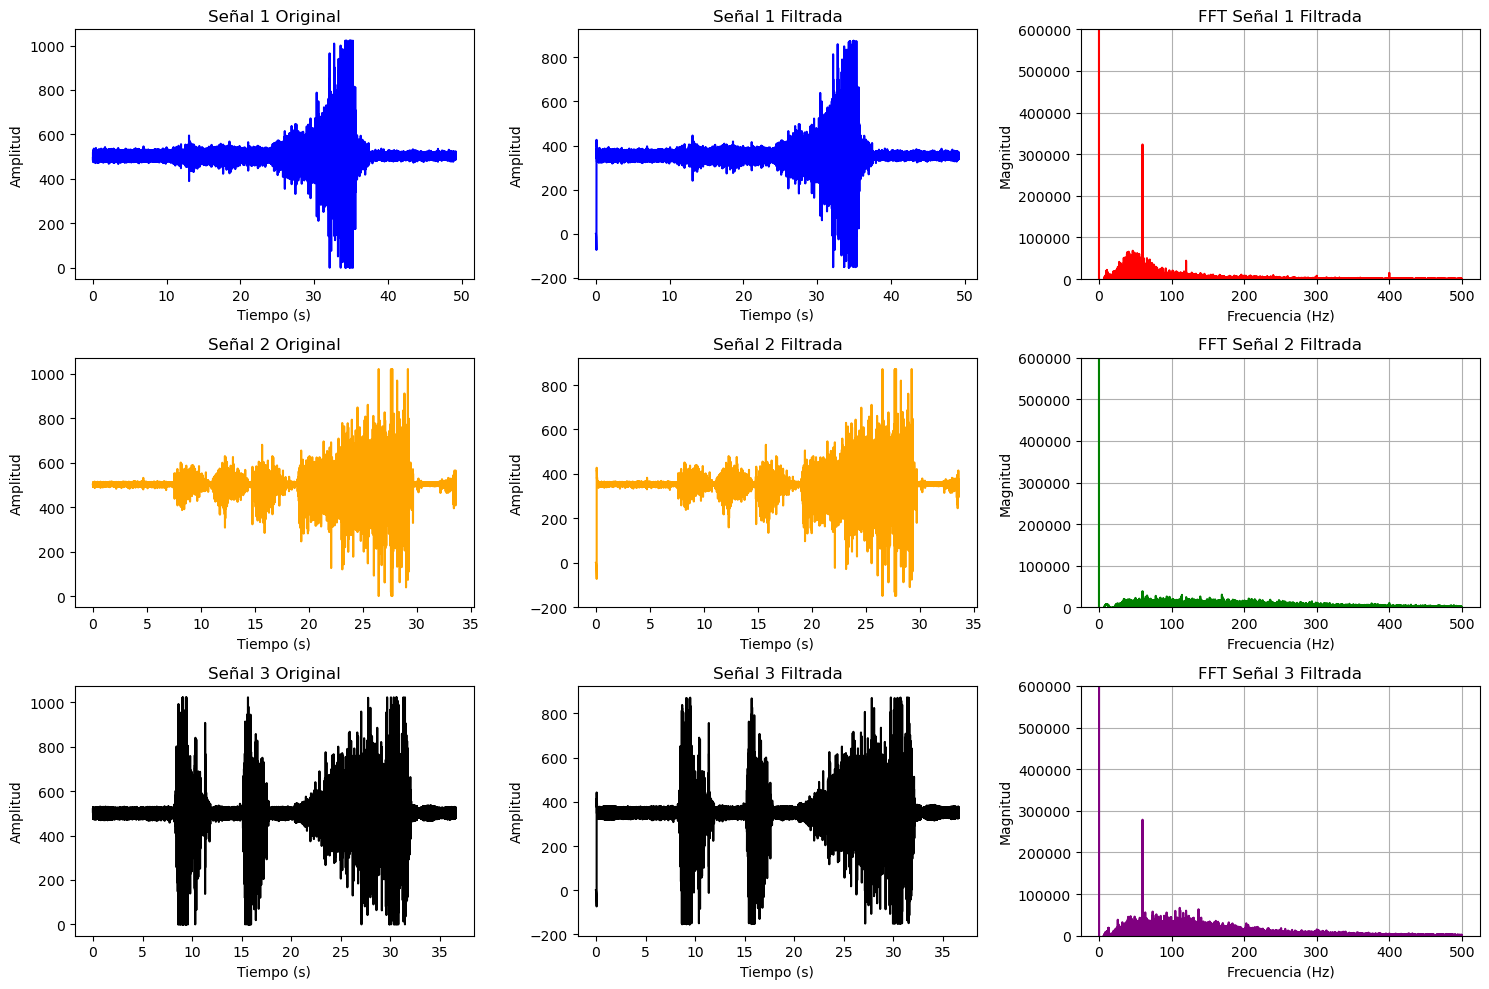

In [167]:
y11 = signal.lfilter(b2h, [1], señal11)
y22 = signal.lfilter(b2h, [1], señal22)
y33 = signal.lfilter(b2h, [1], señal33)
t1 = np.arange(len(y11)) / 1000
t2 = np.arange(len(y22)) / 1000
t3 = np.arange(len(y33)) / 1000

# Crear las subplots: 3 filas y 3 columnas (Señal Original, Señal Filtrada, FFT)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Señal 1
# Columna 1: Señal Original
axs[0, 0].plot(t1, señal11, color="blue")
axs[0, 0].set_title("Señal 1 Original")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[0, 1].plot(t1, y11, color="blue")
axs[0, 1].set_title("Señal 1 Filtrada")
axs[0, 1].set_xlabel("Tiempo (s)")
axs[0, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f1, h1 = calcular_fft(y11, 1000)
axs[0, 2].plot(f1[:len(f1)//2], h1[:len(h1)//2], "red")
axs[0, 2].set_title("FFT Señal 1 Filtrada")
axs[0, 2].set_xlabel("Frecuencia (Hz)")
axs[0, 2].set_ylabel("Magnitud")
axs[0, 2].set_ylim([0, 0.6*10**6])
axs[0, 2].grid(True)

# Señal 2
# Columna 1: Señal Original
axs[1, 0].plot(t2, señal22, color="orange")
axs[1, 0].set_title("Señal 2 Original")
axs[1, 0].set_xlabel("Tiempo (s)")
axs[1, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[1, 1].plot(t2, y22, color="orange")
axs[1, 1].set_title("Señal 2 Filtrada")
axs[1, 1].set_xlabel("Tiempo (s)")
axs[1, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f2, h2 = calcular_fft(y22, 1000)
axs[1, 2].plot(f2[:len(f2)//2], h2[:len(h2)//2], "green")
axs[1, 2].set_title("FFT Señal 2 Filtrada")
axs[1, 2].set_xlabel("Frecuencia (Hz)")
axs[1, 2].set_ylabel("Magnitud")
axs[1, 2].set_ylim([0, 0.6*10**6])
axs[1, 2].grid(True)

# Señal 3
# Columna 1: Señal Original
axs[2, 0].plot(t3, señal33, color="black")
axs[2, 0].set_title("Señal 3 Original")
axs[2, 0].set_xlabel("Tiempo (s)")
axs[2, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[2, 1].plot(t3, y33, color="black")
axs[2, 1].set_title("Señal 3 Filtrada")
axs[2, 1].set_xlabel("Tiempo (s)")
axs[2, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f3, h3 = calcular_fft(y33, 1000)
axs[2, 2].plot(f3[:len(f3)//2], h3[:len(h3)//2], "purple")
axs[2, 2].set_title("FFT Señal 3 Filtrada")
axs[2, 2].set_xlabel("Frecuencia (Hz)")
axs[2, 2].set_ylabel("Magnitud")
axs[2, 2].set_ylim([0, 0.6*10**6])
axs[2, 2].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()



En todas las señales, se parecen a la señales filtradas debido a la naturaleza del filtro y la fs que es de 1000.Por otro lado , en las señales filtradas  se  observa una componente en **60 Hz**, que corresponde al ruido eléctrico de la red. Para mejorar aún más la calidad de las señales, sería ideal aplicar un filtro rechaza banda en **60 Hz** para eliminar este ruido residual. Con este ajuste, las señales estarían completamente listas para un análisis más preciso y confiable.

Tambien se rescata que a pesar que el diagrama de fase nos dice que hay delay y adelantos, la señal se han mantenido visualmente igual.

<h4>Filtro Butterworth(IRR)</h4>

In [87]:
def filtro2(lowcut, highcut, fs, order):
    # Diseño del filtro Butterworth pasabanda
    b, a = signal.butter(order, [lowcut, highcut], btype='band', fs=fs)
    return b, a


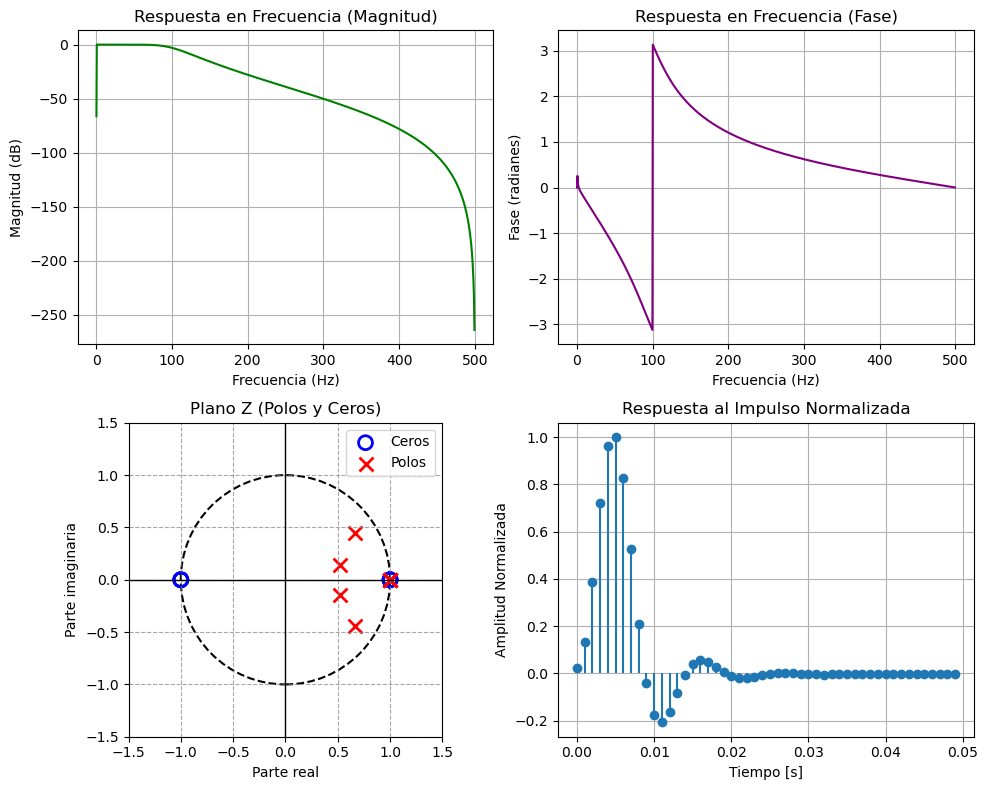

In [159]:
fs=1000
b3,a3=filtro2(0.05,100,fs,4)
analizar_filtro(b3,a3,fs)


En el gráfico de magnitud se observa que el filtro tiene una atenuación significativa a partir de los **100 Hz**, con una caída progresiva que llega hasta **-250 dB** en frecuencias cercanas a **500 Hz**. Dentro del rango de **0.05 Hz a 100 Hz**


El gráfico de fase muestra una variación casi lineal, especialmente en torno a de los **0 Hz** hasta **100 Hz**, con esto se puede predecir los delays y adelantos, con la finalidad que se puede obtener el correcto filtrado

En el diagrama de polos y ceros se pueden observar  polos distribuidos en la cercanía de la circunferencia unitaria del plano Z, mientras que los ceros se encuentran también cerca del eje real. La presencia de un polo cerca a **0 hz** es debido al que se esta permitiendo pasar  frecuencias mayores a **0.05 Hz**  y el cero cercano al **0 hz** quiere decir el filtrado  es por eso que estan juntos.

El gráfico de la respuesta al impulso muestra que la señal se estabiliza debido a que es acotada, lo que es deseado de un filtro 




### Filtro Butterworth(IRR)ECG
- **Frecuencia de corte baja**: 0.05 Hz
- **Frecuencia de corte alta**: 100 Hz

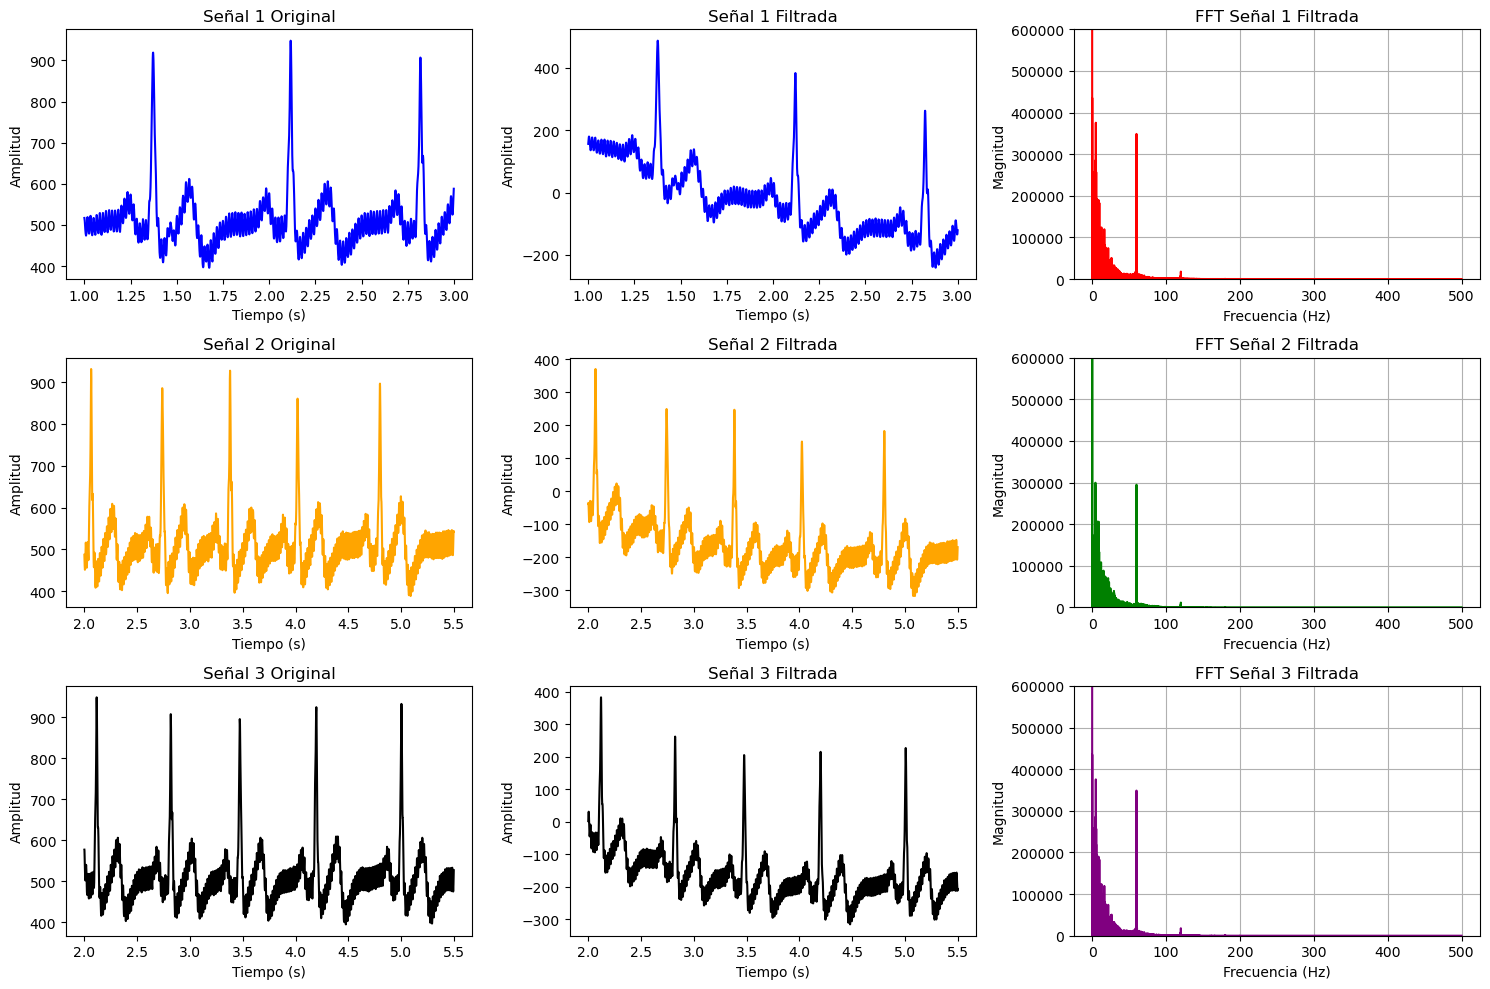

In [160]:

y1 = signal.lfilter(b3, a3, señal1)
y2 = signal.lfilter(b3, a3, señal2)
y3 = signal.lfilter(b3, a3, señal3)

# Crear las subplots: 3 filas y 3 columnas (Señal Original, Señal Filtrada, FFT)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Señal 1
# Columna 1: Señal Original
axs[0, 0].plot(t1[1000:3000], señal1[1000:3000], color="blue")
axs[0, 0].set_title("Señal 1 Original")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[0, 1].plot(t1[1000:3000], y1[1000:3000], color="blue")
axs[0, 1].set_title("Señal 1 Filtrada")
axs[0, 1].set_xlabel("Tiempo (s)")
axs[0, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f1, h1 = calcular_fft(y1, 1000)
axs[0, 2].plot(f1[:len(f1)//2], h1[:len(h1)//2], "red")
axs[0, 2].set_title("FFT Señal 1 Filtrada")
axs[0, 2].set_xlabel("Frecuencia (Hz)")
axs[0, 2].set_ylabel("Magnitud")
axs[0, 2].set_ylim([0, 0.6*10**6])
axs[0, 2].grid(True)

# Señal 2
# Columna 1: Señal Original
axs[1, 0].plot(t2[2000:5500], señal2[2000:5500], color="orange")
axs[1, 0].set_title("Señal 2 Original")
axs[1, 0].set_xlabel("Tiempo (s)")
axs[1, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[1, 1].plot(t2[2000:5500], y2[2000:5500], color="orange")
axs[1, 1].set_title("Señal 2 Filtrada")
axs[1, 1].set_xlabel("Tiempo (s)")
axs[1, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f2, h2 = calcular_fft(y2, 1000)
axs[1, 2].plot(f2[:len(f2)//2], h2[:len(h2)//2], "green")
axs[1, 2].set_title("FFT Señal 2 Filtrada")
axs[1, 2].set_xlabel("Frecuencia (Hz)")
axs[1, 2].set_ylabel("Magnitud")
axs[1, 2].set_ylim([0, 0.6*10**6])
axs[1, 2].grid(True)

# Señal 3
# Columna 1: Señal Original
axs[2, 0].plot(t3[2000:5500], señal3[2000:5500], color="black")
axs[2, 0].set_title("Señal 3 Original")
axs[2, 0].set_xlabel("Tiempo (s)")
axs[2, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[2, 1].plot(t3[2000:5500], y3[2000:5500], color="black")
axs[2, 1].set_title("Señal 3 Filtrada")
axs[2, 1].set_xlabel("Tiempo (s)")
axs[2, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f3, h3 = calcular_fft(y3, 1000)
axs[2, 2].plot(f3[:len(f3)//2], h3[:len(h3)//2], "purple")
axs[2, 2].set_title("FFT Señal 3 Filtrada")
axs[2, 2].set_xlabel("Frecuencia (Hz)")
axs[2, 2].set_ylabel("Magnitud")
axs[2, 2].set_ylim([0, 0.6*10**6])
axs[2, 2].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()




En las señales filtradas, se aprecia que el filtro ha sido efectivo en atenuar las frecuencias por encima de **100 Hz**, lo que es claramente visible en los gráficos de **FFT**. 

Por otro lado, las frecuencias cercanas a **0 Hz** se han mantenido, tal como se puede observar en las señales filtradas. Esto indica que el filtro ha permitido el paso de las componentes de muy baja frecuencia

Se puede observar una componente persistente alrededor de **60 Hz**, que es visible en los gráficos de FFT de las señales filtradas. Esta frecuencia corresponde al ruido eléctrico de la red de alimentación. Para eliminar esta interferencia, sería recomendable aplicar un **filtro rechaza banda** específicamente en **60 Hz**, de modo que se elimine este ruido proveniente del entorno eléctrico y se mejore aún más la calidad de la señal.
Es posible que tambien que por el ruido electronico las señales originales con las filtras presetan gran similitud.

En las señales filtradas, se puede notar un comportamiento descendente en la amplitud, es decir, una reducción progresiva de la señal a lo largo del tiempo. Esto podría deberse a una acumulación de desplazamientos de fase o la eliminación de ciertas componentes de frecuencia que aportaban energía a la señal original. Pero al final se aprecia que se logra estabilizar en un eje por lo cual al final no llegaria a ser un problema .

----



### Filtro Butterworth(IRR)EMG
- **Frecuencia de corte baja**: 2 Hz
- **Frecuencia de corte alta**: 499 Hz

C:\Users\rogge\AppData\Local\Temp\ipykernel_57372\3047464093.py:19: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), "g")  # Convertir la magnitud a dB


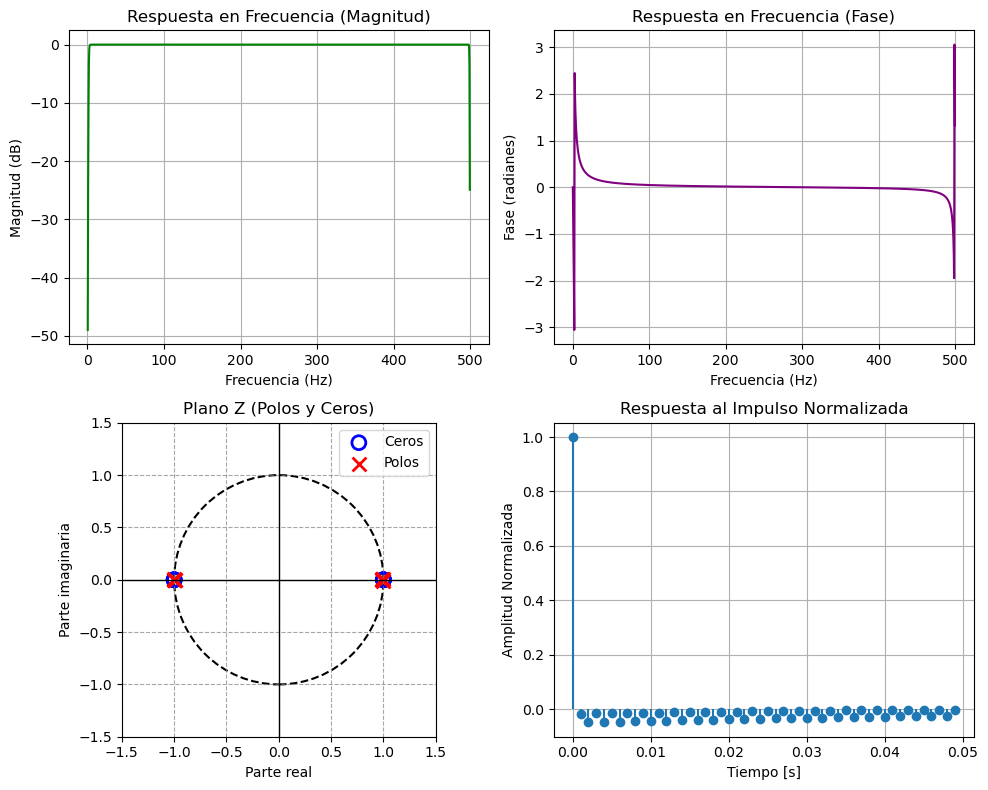

In [168]:
fs=1000
b33,a33=filtro2(2,499,fs,4)
analizar_filtro(b33,a33,fs)


Debido a la naturaleza del filtrado, que abarca el rango de **2 Hz a 500 Hz**, y la frecuencia de muestreo (**fs = 1000 Hz**), el filtro parece dejar pasar prácticamente todas las frecuencias en ese rango sin una atenuación significativa. 

Un aspecto destacable es el comportamiento de la fase. El **diagrama de fase** muestra un patrón cercano al de una función constante, con valores muy cercanos a **0** radianes. Esto significa que el filtro introduce muy poco desfase con respecto a la señal original, lo cual es beneficioso, ya que asegura que la señal filtrada no experimenta retrasos o adelantamientos significativos en su contenido de frecuencia.

El filtro es estable, como se puede comprobar a partir de la **respuesta al impulso**. La energía de la señal está acotada en los primeros instantes del impulso, lo que confirma que el sistema es estable



c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


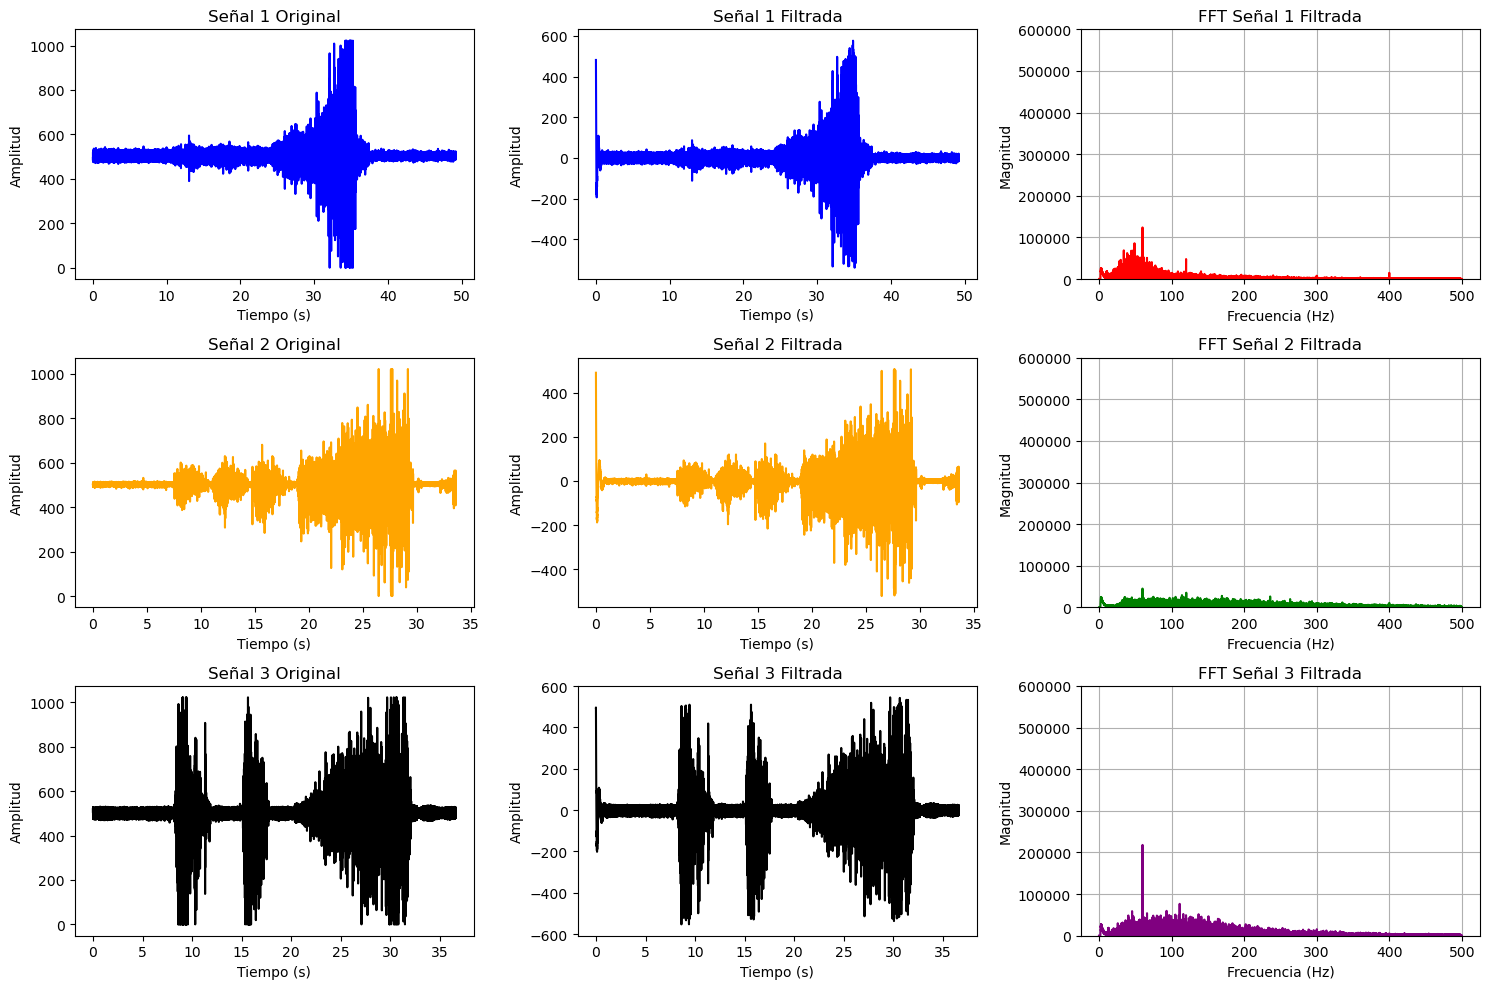

In [169]:
y11 = signal.lfilter(b33, a33, señal11)
y22 = signal.lfilter(b33, a33, señal22)
y33 = signal.lfilter(b33, a33, señal33)
t1 = np.arange(len(y11)) / 1000
t2 = np.arange(len(y22)) / 1000
t3 = np.arange(len(y33)) / 1000

# Crear las subplots: 3 filas y 3 columnas (Señal Original, Señal Filtrada, FFT)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Señal 1
# Columna 1: Señal Original
axs[0, 0].plot(t1, señal11, color="blue")
axs[0, 0].set_title("Señal 1 Original")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[0, 1].plot(t1, y11, color="blue")
axs[0, 1].set_title("Señal 1 Filtrada")
axs[0, 1].set_xlabel("Tiempo (s)")
axs[0, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f1, h1 = calcular_fft(y11, 1000)
axs[0, 2].plot(f1[:len(f1)//2], h1[:len(h1)//2], "red")
axs[0, 2].set_title("FFT Señal 1 Filtrada")
axs[0, 2].set_xlabel("Frecuencia (Hz)")
axs[0, 2].set_ylabel("Magnitud")
axs[0, 2].set_ylim([0, 0.6*10**6])
axs[0, 2].grid(True)

# Señal 2
# Columna 1: Señal Original
axs[1, 0].plot(t2, señal22, color="orange")
axs[1, 0].set_title("Señal 2 Original")
axs[1, 0].set_xlabel("Tiempo (s)")
axs[1, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[1, 1].plot(t2, y22, color="orange")
axs[1, 1].set_title("Señal 2 Filtrada")
axs[1, 1].set_xlabel("Tiempo (s)")
axs[1, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f2, h2 = calcular_fft(y22, 1000)
axs[1, 2].plot(f2[:len(f2)//2], h2[:len(h2)//2], "green")
axs[1, 2].set_title("FFT Señal 2 Filtrada")
axs[1, 2].set_xlabel("Frecuencia (Hz)")
axs[1, 2].set_ylabel("Magnitud")
axs[1, 2].set_ylim([0, 0.6*10**6])
axs[1, 2].grid(True)

# Señal 3
# Columna 1: Señal Original
axs[2, 0].plot(t3, señal33, color="black")
axs[2, 0].set_title("Señal 3 Original")
axs[2, 0].set_xlabel("Tiempo (s)")
axs[2, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[2, 1].plot(t3, y33, color="black")
axs[2, 1].set_title("Señal 3 Filtrada")
axs[2, 1].set_xlabel("Tiempo (s)")
axs[2, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f3, h3 = calcular_fft(y33, 1000)
axs[2, 2].plot(f3[:len(f3)//2], h3[:len(h3)//2], "purple")
axs[2, 2].set_title("FFT Señal 3 Filtrada")
axs[2, 2].set_xlabel("Frecuencia (Hz)")
axs[2, 2].set_ylabel("Magnitud")
axs[2, 2].set_ylim([0, 0.6*10**6])
axs[2, 2].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()



Lo destacable de este filtrado es que las frecuencias muy cercanas a **0 Hz** han sido efectivamente eliminadas, mientras que las demás frecuencias dentro del rango de **2 Hz a 500 Hz** se han mantenido como se esperaba. 

Al comparar la señal original con la señal filtrada en el dominio del tiempo, no se observa un **delay** significativo entre ambas. Si hay algún desfase, este debe ser mínimo y no es perceptible visualmente en los gráficos. Esto indica que el filtro no introduce un retraso considerable en la señal procesada

Se puede observar una componente persistente alrededor de **60 Hz**, que es visible en los gráficos de FFT de las señales filtradas. Esta frecuencia corresponde al ruido eléctrico de la red de alimentación. Para eliminar esta interferencia, sería recomendable aplicar un **filtro rechaza banda** específicamente en **60 Hz**, de modo que se elimine este ruido proveniente del entorno eléctrico y se mejore aún más la calidad de la señal.
Es posible que tambien que por el ruido electronico las señales originales con las filtras presetan gran similitud.

----





  <h4>Filtro notch</h4>


In [43]:
def diseño_filtro_iir_notch(freq_notch, Q, fs):

    # Normalizar la frecuencia de la señal respecto a la frecuencia de Nyquist
    nyq = 0.5 * fs
    freq_normalizada = freq_notch / nyq

    # Diseñar el filtro IIR Notch utilizando iirnotch
    b, a = signal.iirnotch(freq_normalizada, Q)
    return b,a

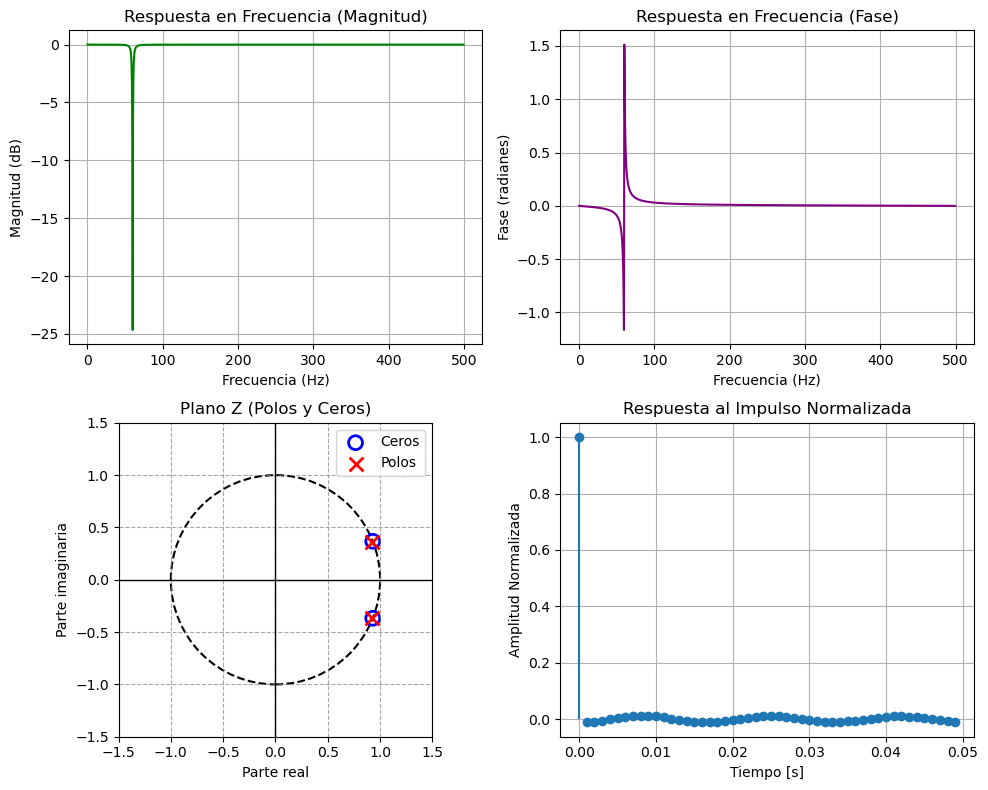

In [172]:
fs=1000
bn,an=diseño_filtro_iir_notch(60,30,fs)
analizar_filtro(bn,an,fs)



En el gráfico de magnitud se observa  que el filtro rechaza específicamente la frecuencia de **60 Hz** y cercanas a ella , lo que corresponde a una atenuación significativa en ese punto. Esta atenuación asegura que cualquier componente en **60 Hz**, como el ruido eléctrico de la red, será eliminada o fuertemente reducida. Las demás frecuencias fuera de los **60 Hz** no experimentan cambios importantes, lo que significa que el filtro afecta únicamente la banda seleccionada sin interferir con las frecuencias circundantes.


El gráfico de fase muestra un cambio abrupto alrededor de **60 Hz**, que es típico en un filtro rechaza banda. Este tipo de cambio puede introducir un pequeño desfase en las señales cercanas a **60 Hz**,sin embargo no es preocupante debido a que se atenua la frecuencia 60 hz, llegando a ser irrelevante al final 

En el diagrama de polos y ceros, los ceros ubicados en la circunferencia unitaria en el plano Z y los polos en posiciones correspondientes para asegurar la estabilidad del filtro. Este diseño asegura que las frecuencias cercanas a **60 Hz** sean atenuadas correctamente, mientras que las demás frecuencias permanecen prácticamente inalteradas.


La respuesta al impulso muestra que el filtro es estable, ya que la respuesta inicial es acotada y se estabiliza rápidamente.




### Selección de Filtros

Debido a que ciertos filtros presentan características favorables, como la ausencia de delay significativo, buena atenuación y estabilidad, se ha escogido el **filtro Butterworth** para realizar un primer filtrado de la señal **EMG**. Posteriormente, se complementará este proceso con un **filtro notch** para eliminar las frecuencias indeseadas, específicamente en **60 Hz**, logrando así obtener la señal final con una mayor calidad y sin interferencias significativas.

Para la señal **ECG**, se consideró adecuado utilizar un **filtro Hamming**, que ofrece una buena respuesta para este tipo de señales, asegurando que las frecuencias relevantes sean preservadas mientras se atenúan las no deseadas, posteriormente complementarlo con el filtro notch
.


### Filtro notch ECG


c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


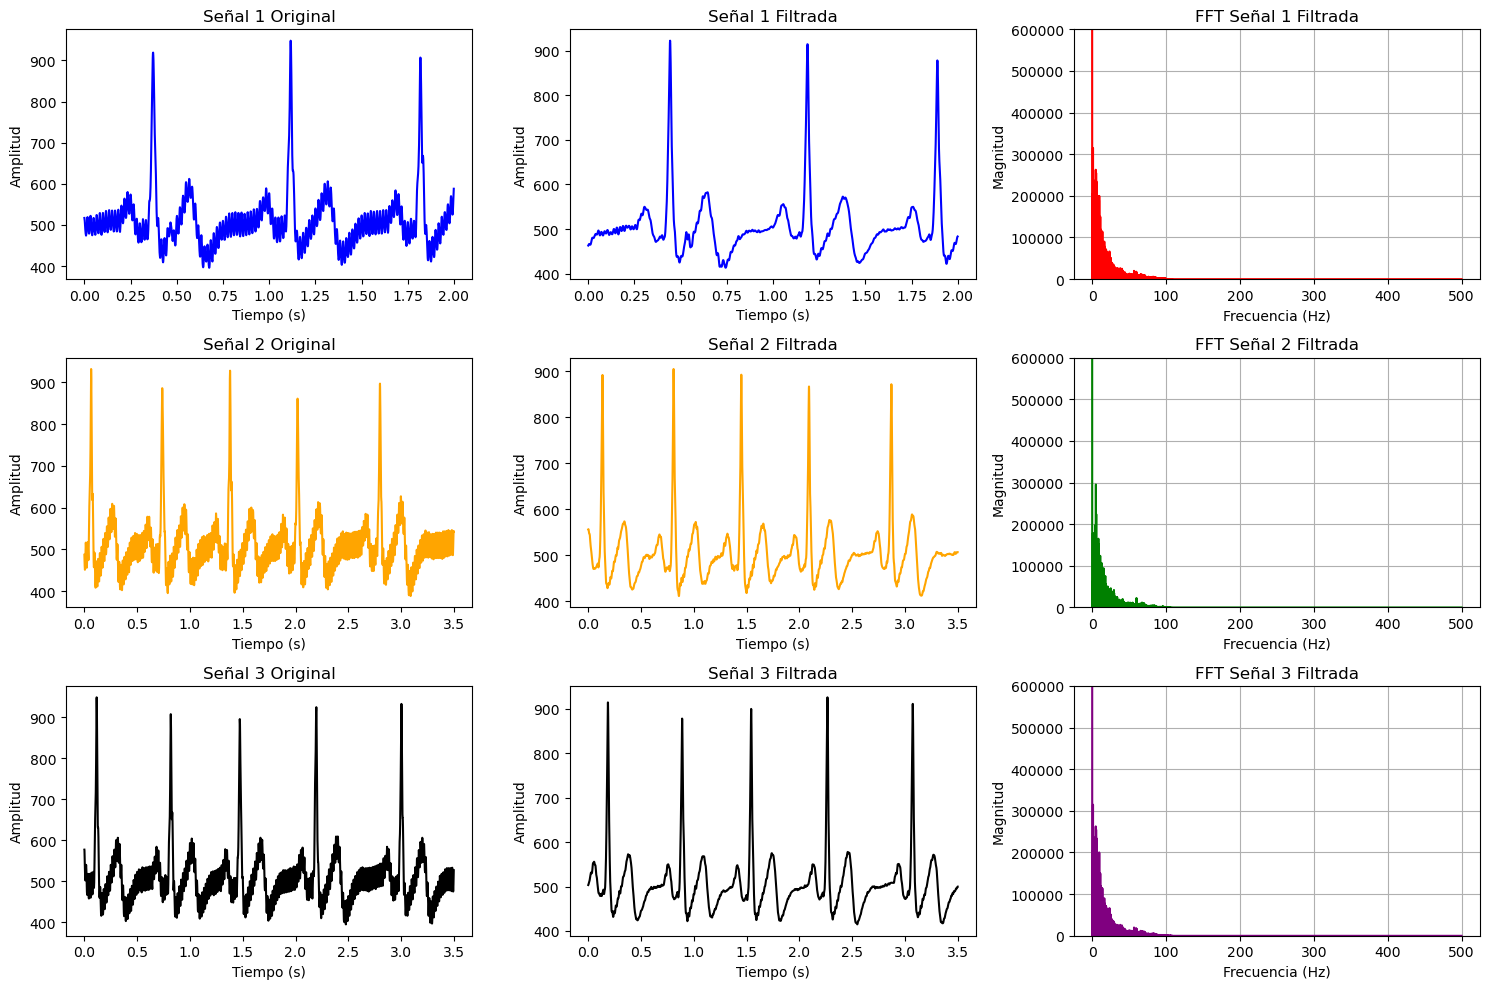

In [193]:
señal1 = funcion_leer("señal1.txt")
señal2 = funcion_leer("señal2.txt")
señal3 = funcion_leer("señal3.txt")

# Aplicar los filtros Butterworth y Notch
a2 = [1]  # El denominador 'a' para un filtro FIR es 1
y1 = signal.lfilter(b2, a2, señal1)
y2 = signal.lfilter(b2, a2, señal2)
y3 = signal.lfilter(b2, a2, señal3)

# Aplicar el filtro Notch
y1f = signal.lfilter(bn, an, y1)
y2f = signal.lfilter(bn, an, y2)
y3f = signal.lfilter(bn, an, y3)

# Generar los vectores de tiempo
t1 = np.arange(len(señal1[1000:3000])) / 1000
t2 = np.arange(len(señal2[2000:5500])) / 1000
t3 = np.arange(len(señal3[2000:5500])) / 1000

# Crear las subplots: 3 filas y 3 columnas (Señal Original, Señal Filtrada, FFT)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Señal 1
# Columna 1: Señal Original
axs[0, 0].plot(t1, señal1[1000:3000], color="blue")
axs[0, 0].set_title("Señal 1 Original")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[0, 1].plot(t1, y1f[1000:3000], color="blue")
axs[0, 1].set_title("Señal 1 Filtrada")
axs[0, 1].set_xlabel("Tiempo (s)")
axs[0, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f1, h1 = calcular_fft(y1f, 1000)
axs[0, 2].plot(f1[:len(f1)//2], h1[:len(h1)//2], "red")
axs[0, 2].set_title("FFT Señal 1 Filtrada")
axs[0, 2].set_xlabel("Frecuencia (Hz)")
axs[0, 2].set_ylabel("Magnitud")
axs[0, 2].set_ylim([0, 0.6*10**6])
axs[0, 2].grid(True)

# Señal 2
# Columna 1: Señal Original
axs[1, 0].plot(t2, señal2[2000:5500], color="orange")
axs[1, 0].set_title("Señal 2 Original")
axs[1, 0].set_xlabel("Tiempo (s)")
axs[1, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[1, 1].plot(t2, y2f[2000:5500], color="orange")
axs[1, 1].set_title("Señal 2 Filtrada")
axs[1, 1].set_xlabel("Tiempo (s)")
axs[1, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f2, h2 = calcular_fft(y2f, 1000)
axs[1, 2].plot(f2[:len(f2)//2], h2[:len(h2)//2], "green")
axs[1, 2].set_title("FFT Señal 2 Filtrada")
axs[1, 2].set_xlabel("Frecuencia (Hz)")
axs[1, 2].set_ylabel("Magnitud")
axs[1, 2].set_ylim([0, 0.6*10**6])
axs[1, 2].grid(True)

# Señal 3
# Columna 1: Señal Original
axs[2, 0].plot(t3, señal3[2000:5500], color="black")
axs[2, 0].set_title("Señal 3 Original")
axs[2, 0].set_xlabel("Tiempo (s)")
axs[2, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[2, 1].plot(t3, y3f[2000:5500], color="black")
axs[2, 1].set_title("Señal 3 Filtrada")
axs[2, 1].set_xlabel("Tiempo (s)")
axs[2, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f3, h3 = calcular_fft(y3f, 1000)
axs[2, 2].plot(f3[:len(f3)//2], h3[:len(h3)//2], "purple")
axs[2, 2].set_title("FFT Señal 3 Filtrada")
axs[2, 2].set_xlabel("Frecuencia (Hz)")
axs[2, 2].set_ylabel("Magnitud")
axs[2, 2].set_ylim([0, 0.6*10**6])
axs[2, 2].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Filtro notch EMG

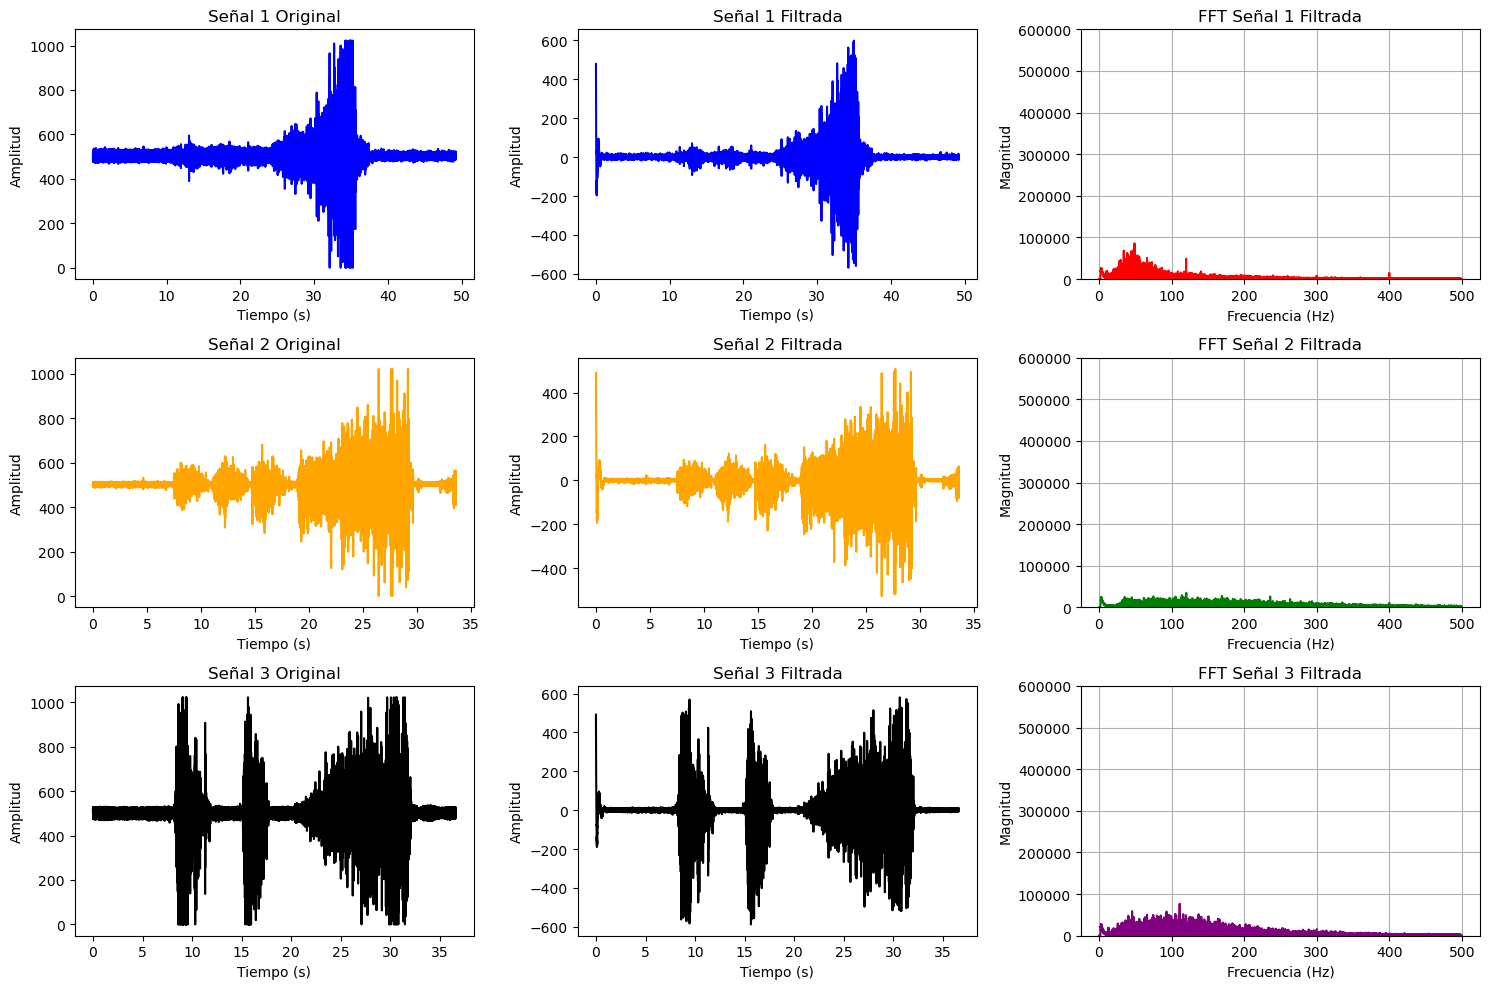

In [175]:

y11 = signal.lfilter(b33, a33, señal11)
y22 = signal.lfilter(b33, a33, señal22)
y33 = signal.lfilter(b33, a33, señal33)

y11 = signal.lfilter(bn, an, y11)
y22 = signal.lfilter(bn, an, y22)
y33 = signal.lfilter(bn, an, y33)

t1 = np.arange(len(y11)) / 1000
t2 = np.arange(len(y22)) / 1000
t3 = np.arange(len(y33)) / 1000

# Crear las subplots: 3 filas y 3 columnas (Señal Original, Señal Filtrada, FFT)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Señal 1
# Columna 1: Señal Original
axs[0, 0].plot(t1, señal11, color="blue")
axs[0, 0].set_title("Señal 1 Original")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[0, 1].plot(t1, y11, color="blue")
axs[0, 1].set_title("Señal 1 Filtrada")
axs[0, 1].set_xlabel("Tiempo (s)")
axs[0, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f1, h1 = calcular_fft(y11, 1000)
axs[0, 2].plot(f1[:len(f1)//2], h1[:len(h1)//2], "red")
axs[0, 2].set_title("FFT Señal 1 Filtrada")
axs[0, 2].set_xlabel("Frecuencia (Hz)")
axs[0, 2].set_ylabel("Magnitud")
axs[0, 2].set_ylim([0, 0.6*10**6])
axs[0, 2].grid(True)

# Señal 2
# Columna 1: Señal Original
axs[1, 0].plot(t2, señal22, color="orange")
axs[1, 0].set_title("Señal 2 Original")
axs[1, 0].set_xlabel("Tiempo (s)")
axs[1, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[1, 1].plot(t2, y22, color="orange")
axs[1, 1].set_title("Señal 2 Filtrada")
axs[1, 1].set_xlabel("Tiempo (s)")
axs[1, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f2, h2 = calcular_fft(y22, 1000)
axs[1, 2].plot(f2[:len(f2)//2], h2[:len(h2)//2], "green")
axs[1, 2].set_title("FFT Señal 2 Filtrada")
axs[1, 2].set_xlabel("Frecuencia (Hz)")
axs[1, 2].set_ylabel("Magnitud")
axs[1, 2].set_ylim([0, 0.6*10**6])
axs[1, 2].grid(True)

# Señal 3
# Columna 1: Señal Original
axs[2, 0].plot(t3, señal33, color="black")
axs[2, 0].set_title("Señal 3 Original")
axs[2, 0].set_xlabel("Tiempo (s)")
axs[2, 0].set_ylabel("Amplitud")

# Columna 2: Señal Filtrada
axs[2, 1].plot(t3, y33, color="black")
axs[2, 1].set_title("Señal 3 Filtrada")
axs[2, 1].set_xlabel("Tiempo (s)")
axs[2, 1].set_ylabel("Amplitud")

# Columna 3: FFT de la Señal Filtrada
f3, h3 = calcular_fft(y33, 1000)
axs[2, 2].plot(f3[:len(f3)//2], h3[:len(h3)//2], "purple")
axs[2, 2].set_title("FFT Señal 3 Filtrada")
axs[2, 2].set_xlabel("Frecuencia (Hz)")
axs[2, 2].set_ylabel("Magnitud")
axs[2, 2].set_ylim([0, 0.6*10**6])
axs[2, 2].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Vemos que tanto en el **ECG** como en el **EMG**, después de aplicar el **filtro notch**, se ha logrado atenuar efectivamente las frecuencias indeseadas alrededor de **60 Hz**. Esto elimina el ruido proveniente de la red eléctrica, que es una interferencia común en este tipo de señales. Como resultado, obtenemos las señales finales ya filtradas, libres de este ruido y con una mayor calidad para su análisis posterior.


## bibliografia:
[1] A. J. Rufino, "Capítulo 2: Filtros", Tesis de Licenciatura, Universidad de las Américas Puebla, 2019. [En línea]. Disponible: https://catarina.udlap.mx/u_dl_a/tales/documentos/lem/rufino_a_j/capitulo2.pdf. [Accedido: 06-oct-2024].

[2] F. V. Fernández, "Aproximación de filtros", Departamento de Electrónica y Electromagnetismo, Universidad de Sevilla, 1997. [En línea]. Disponible: http://www2.imse-cnm.csic.es/elec_esi/asignat/ASC/1997-98/pdf/tema4.pdf. [Accedido: 06-oct-2024].

[3] M. B. Muñoz Buitrón y A. D. Dorado Peña, Diseño de filtros digitales tipo FIR, IIR y adaptativos utilizando FPGA, Universidad del Cauca, Facultad de Ingeniería Electrónica y Telecomunicaciones, Departamento de Telecomunicaciones, 2011.

[4] J. D. Bronzino (Ed.), Medical devices and systems, CRC Press, 2006.


  <h3>Funciones: </h3>

  <h4>Importar librerias </h4>

In [91]:

import zplane as zp
import pandas as pd
import numpy as np 
from scipy.signal import lfilter

import scipy.signal as signal
import matplotlib.pyplot as plt
from IPython.display import HTML


  <h4>Función leer señales </h4>

In [92]:
def funcion_leer(nombre):
# Ruta al archivo

    # Leer el archivo
    with open(nombre, 'r') as file:
        # Saltar las líneas de encabezado hasta que termine el EndOfHeader
        while True:
            line = file.readline()
            if "EndOfHeader" in line:
                break
        
        # Cargar los datos en un DataFrame
        data = pd.read_csv(file, delimiter='\t', header=None)
        
    # Seleccionar solo la quinta columna (índice 4 ya que Python empieza desde 0)
    columna_5 = data.iloc[:, 5]

    # Convertir la columna a un array de NumPy
    array_np = np.array(columna_5)
    return array_np
  


   

  <h4>Función graficos </h4>

In [93]:
def graficar(x, y, color='blue', titulo='Gráfica'):
    #plt.figure(12,12)
    plt.plot(x, y, color=color)  # Graficar los puntos con el color especificado
    plt.title(titulo)            # Título de la gráfica
    plt.xlabel('Tiempo(s)')          # Etiqueta del eje X
    plt.ylabel('Amplitud')          # Etiqueta del eje Y
    plt.grid(True)               # Mostrar una rejilla en la gráfica
    plt.show()

<h4>Función FFT </h4>

In [ ]:
def calcular_fft(signal, sample_rate):
    N = len(signal)  # Número de muestras
    fft_values = np.fft.fft(signal)  # Calcular la FFT
    freqs = np.fft.fftfreq(N, 1/sample_rate)  # Calcular las frecuencias correspondientes
    return freqs, fft_values   

<h4>Función para analizar filtros </h4>

In [80]:
def analizar_filtro(b, a, fs):    
    # Calcular la frecuencia de Nyquist
    nyquist = fs / 2  # Frecuencia de Nyquist
    
    # Convertir los coeficientes a ceros, polos y ganancia
    zeros, poles, gain = signal.tf2zpk(b, a)

    # Crear el sistema discreto con TransferFunction
    tf = signal.TransferFunction(b, a, dt=1/fs)

    # Calcular la respuesta en frecuencia
    w, h = signal.freqz(b, a, worN=1024, fs=fs)

    # Crear la figura con 2x2 subplots
    plt.figure(figsize=(10, 8))

    # Subplot 1: Respuesta en frecuencia (Magnitud)
    plt.subplot(2, 2, 1)
    plt.plot(w, 20 * np.log10(abs(h)), "g")  # Convertir la magnitud a dB
    plt.title('Respuesta en Frecuencia (Magnitud)')
    plt.ylabel('Magnitud (dB)')
    plt.xlabel('Frecuencia (Hz)')
    plt.grid(True)

    # Subplot 2: Respuesta en frecuencia (Fase)
    plt.subplot(2, 2, 2)
    plt.plot(w, np.angle(h), "purple")  # Fase en radianes
    plt.title('Respuesta en Frecuencia (Fase)')
    plt.ylabel('Fase (radianes)')
    plt.xlabel('Frecuencia (Hz)')
    plt.grid(True)

    # Subplot 3: Diagrama de polos y ceros (Pole-Zero plot)
    plt.subplot(2, 2, 3)
    # Dibujar el círculo unitario
    unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1.5)
    plt.gca().add_artist(unit_circle)

    # Graficar los ceros (círculos vacíos) y los polos (cruces)
    plt.scatter(np.real(zeros), np.imag(zeros), s=100, facecolors='none', edgecolors='blue', label="Ceros", linewidth=2)
    plt.scatter(np.real(poles), np.imag(poles), s=100, marker='x', color='red', label="Polos", linewidth=2)

    # Añadir líneas de referencia en el plano complejo
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    # Configurar límites del gráfico
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])

    # Configurar la cuadrícula y el aspecto del gráfico
    plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)
    plt.gca().set_aspect('equal', adjustable='box')

    # Añadir etiquetas y título
    plt.xlabel("Parte real")
    plt.ylabel("Parte imaginaria")
    plt.title("Plano Z (Polos y Ceros)")
    plt.legend()

    # Subplot 4: Normalización (graficamos la respuesta al impulso normalizada)
    plt.subplot(2, 2, 4)
    t, y = signal.dimpulse(tf, n=50)
    y_norm = np.squeeze(y) / np.max(np.abs(y))  # Normalizamos la respuesta al impulso
    plt.stem(t, y_norm, basefmt=" ")
    plt.title("Respuesta al Impulso Normalizada")
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud Normalizada')
    plt.grid(True)

    # Ajustar el diseño de los subplots para evitar solapamientos
    plt.tight_layout()
    plt.show()
    
def analizar_filtro_fir(b, fs):
    # Calcular la respuesta en frecuencia
    w, h = signal.freqz(b, worN=1024, fs=fs)

    # Crear la figura con 2x2 subplots
    plt.figure(figsize=(10, 8))

    # Subplot 1: Respuesta en frecuencia (Magnitud)
    plt.subplot(2, 2, 1)
    plt.plot(w, 20 * np.log10(abs(h)), "g")  # Convertir la magnitud a dB
    plt.title('Respuesta en Frecuencia (Magnitud)')
    plt.ylabel('Magnitud (dB)')
    plt.xlabel('Frecuencia (Hz)')
    plt.grid(True)

    # Subplot 2: Respuesta en frecuencia (Fase)
    plt.subplot(2, 2, 2)
    plt.plot(w, np.angle(h), "purple")  # Fase en radianes
    plt.title('Respuesta en Frecuencia (Fase)')
    plt.ylabel('Fase (radianes)')
    plt.xlabel('Frecuencia (Hz)')
    plt.grid(True)

    # Subplot 3: Diagrama de ceros
    plt.subplot(2, 2, 3)
    zeros = np.roots(b)  # Calcular los ceros del filtro FIR

    # Dibujar el círculo unitario
    unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1.5)
    plt.gca().add_artist(unit_circle)

    # Graficar los ceros (círculos vacíos)
    plt.scatter(np.real(zeros), np.imag(zeros), s=100, facecolors='none', edgecolors='blue', label="Ceros", linewidth=2)

    # Añadir líneas de referencia en el plano complejo
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    # Configurar límites del gráfico
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])

    # Configurar la cuadrícula y el aspecto del gráfico
    plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)
    plt.gca().set_aspect('equal', adjustable='box')

    # Añadir etiquetas y título
    plt.xlabel("Parte real")
    plt.ylabel("Parte imaginaria")
    plt.title("Diagrama de Ceros (FIR)")
    plt.legend()

    # Subplot 4: Normalización y graficar la respuesta al impulso FIR
    plt.subplot(2, 2, 4)
    
    # Generar un impulso (array con el primer valor 1 y el resto 0)
    impulse = np.zeros(100)
    impulse[0] = 1

    # Calcular la respuesta al impulso usando FIR
    impulse_response = signal.lfilter(b, [1.0], impulse)

    # Normalizar la respuesta al impulso
    impulse_response /= np.max(np.abs(impulse_response))

    # Graficar la respuesta al impulso FIR
    plt.stem(impulse_response)
    plt.title("Respuesta al Impulso Normalizada (FIR)")
    plt.xlabel('Índice de tiempo [n]')
    plt.ylabel('Amplitud Normalizada')
    plt.grid(True)

    # Ajustar el diseño de los subplots para evitar solapamientos
    plt.tight_layout()
    plt.show()